# Imports

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from scikit_posthocs import posthoc_dunn
from scipy import stats
import seaborn as sns

sns.set_theme(rc={'figure.dpi': 300})

# Load data

In [21]:
df = pd.read_csv('FairFace_predictions.csv')
df

gender            race      image  scut_predictions  meb_predictions
0        male      east asian      1.jpg          0.429688         0.535156
1      female          indian      2.jpg          0.507812         0.570312
2      female           black      3.jpg          0.419922         0.404297
3      female          indian      4.jpg          0.542969         0.621094
4      female          indian      5.jpg          0.531250         0.542969
...       ...             ...        ...               ...              ...
84724    male  middle eastern  86739.jpg          0.589844         0.515625
84725    male          indian  86740.jpg          0.500000         0.554688
84726  female          indian  86742.jpg          0.394531         0.396484
84727  female           black  86743.jpg          0.531250         0.667969
84728    male           white  86744.jpg          0.447266         0.507812

[84729 rows x 5 columns]

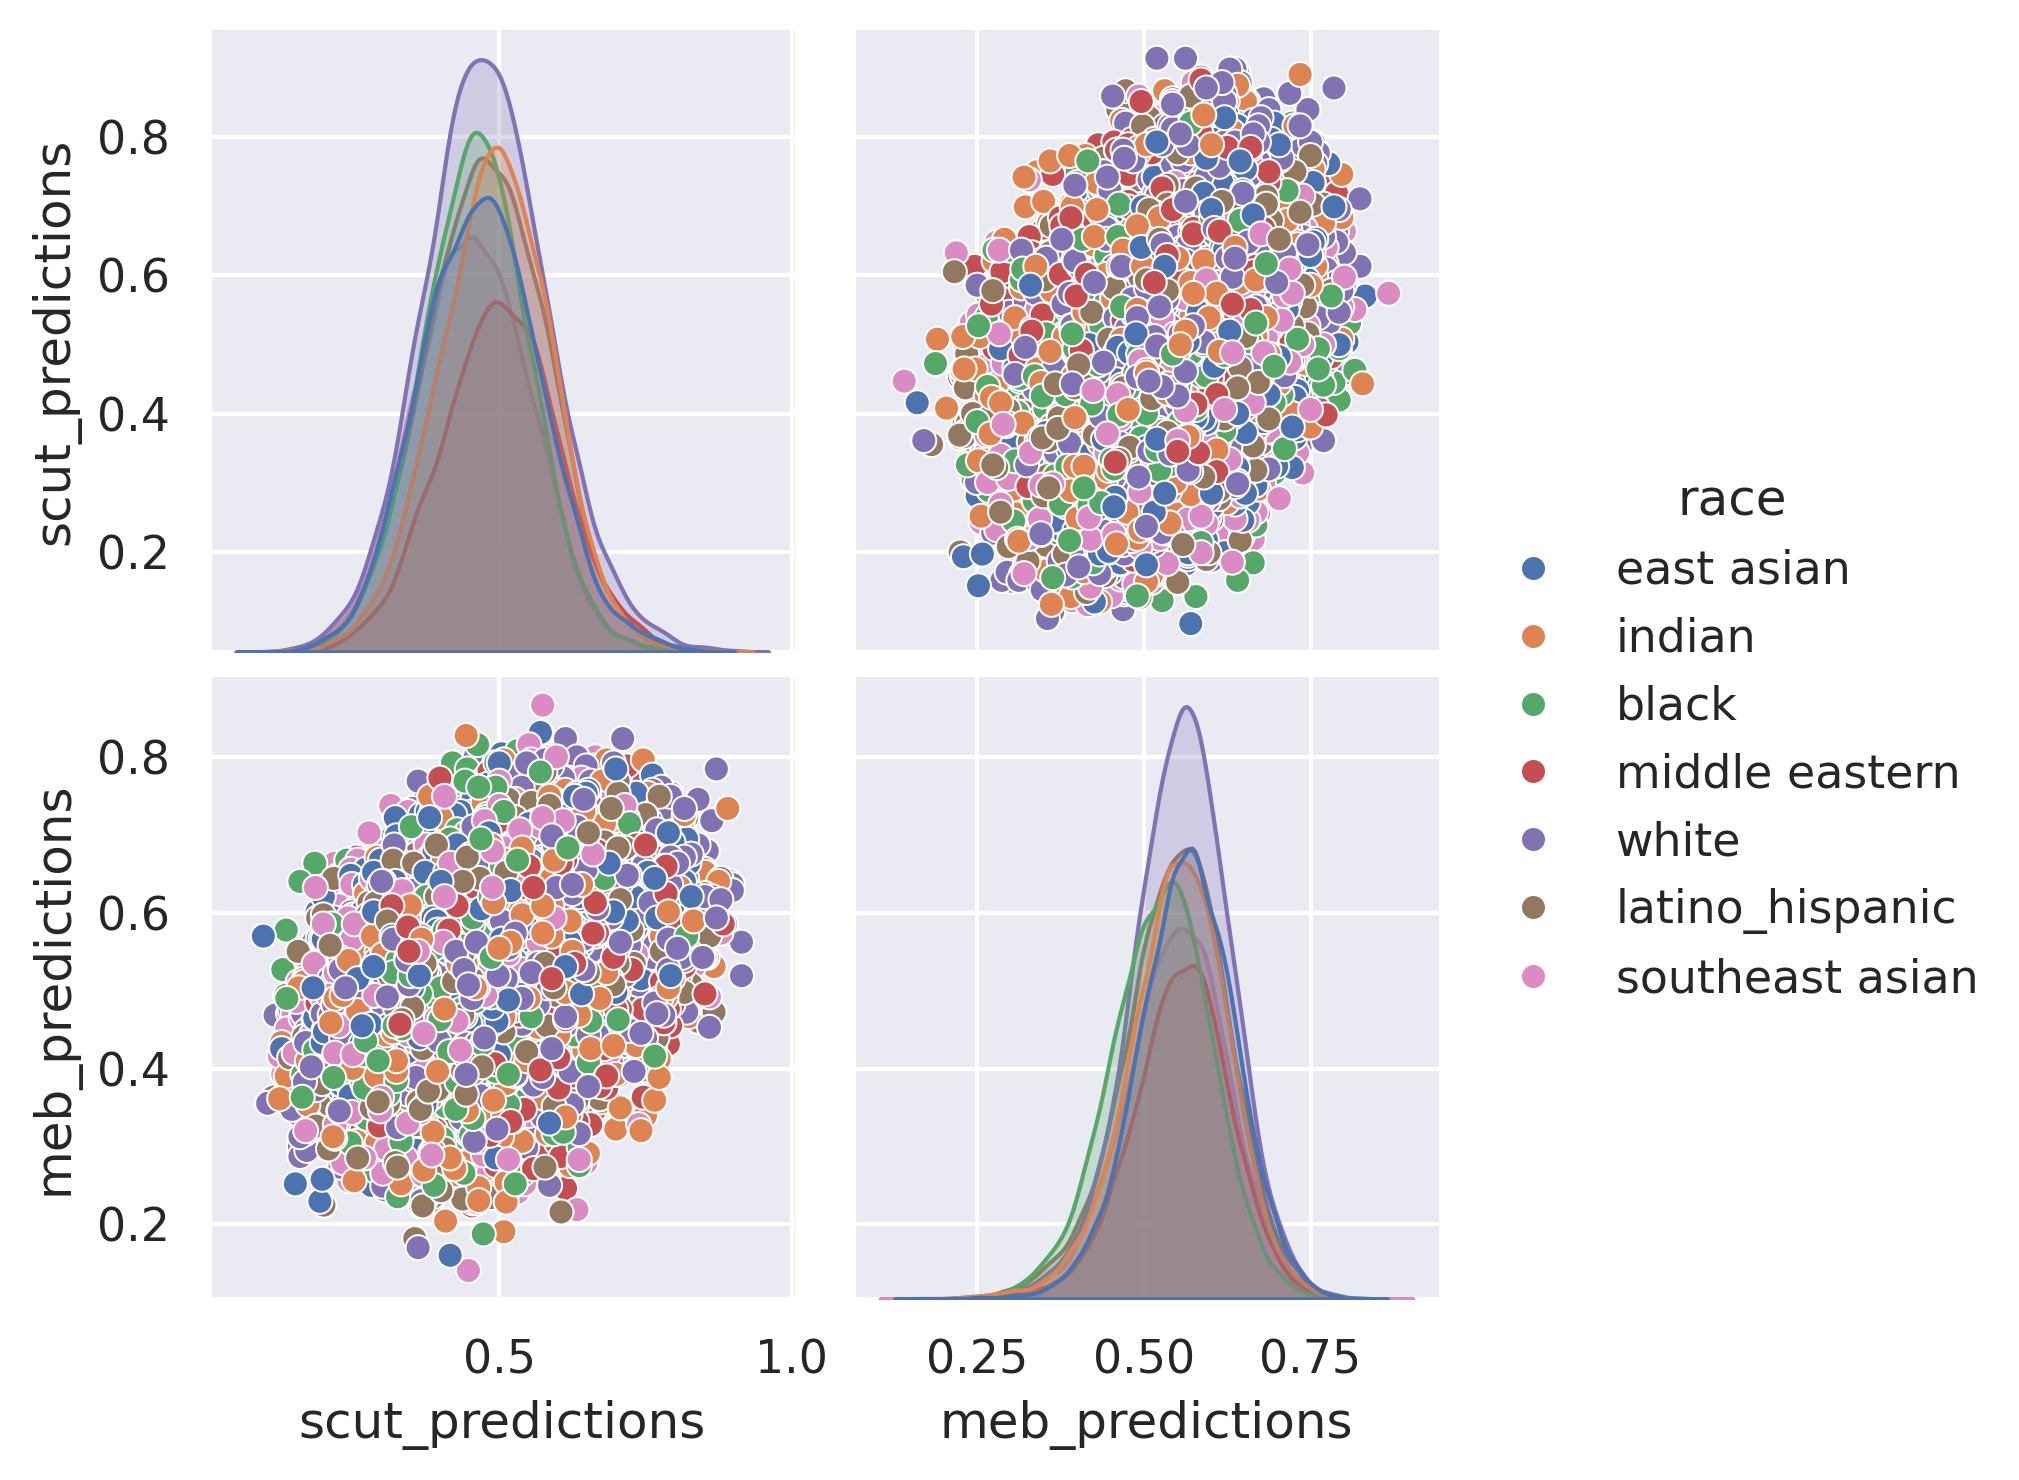

In [22]:
sns.pairplot(df, hue='race');

In [23]:
df.groupby('race').describe().T

race                           black    east asian        indian  \
scut_predictions count  11897.000000  12016.000000  12130.000000   
                 mean       0.460264      0.470438      0.492552   
                 std        0.092128      0.102505      0.096634   
                 min        0.129883      0.096680      0.124512   
                 25%        0.398438      0.398438      0.429688   
                 50%        0.460938      0.468750      0.494141   
                 75%        0.519531      0.539062      0.558594   
                 max        0.863281      0.855469      0.890625   
meb_predictions  count  11897.000000  12016.000000  12130.000000   
                 mean       0.525236      0.563466      0.550428   
                 std        0.077057      0.073176      0.075802   
                 min        0.187500      0.160156      0.190430   
                 25%        0.474609      0.515625      0.503906   
                 50%        0.527344      0.566406      0.554688   
                 75%        0.578125      0.613281      0.601562   
                 max        0.816406      0.832031      0.828125   

race                    latino_hispanic  middle eastern  southeast asian  \
scut_predictions count     13109.000000     8988.000000     10600.000000   
                 mean          0.479194        0.500248         0.454864   
                 std           0.102385        0.100678         0.097565   
                 min           0.113770        0.166992         0.124023   
                 25%           0.408203        0.433594         0.388672   
                 50%           0.478516        0.500000         0.455078   
                 75%           0.550781        0.566406         0.523438   
                 max           0.867188        0.886719         0.878906   
meb_predictions  count     13109.000000     8988.000000     10600.000000   
                 mean          0.547533        0.554951         0.547341   
                 std           0.079262        0.073244         0.077046   
                 min           0.181641        0.223633         0.140625   
                 25%           0.498047        0.507812         0.500000   
                 50%           0.550781        0.558594         0.550781   
                 75%           0.601562        0.605469         0.597656   
                 max           0.808594        0.800781         0.867188   

race                           white  
scut_predictions count  15989.000000  
                 mean       0.479168  
                 std        0.107146  
                 min        0.104004  
                 25%        0.408203  
                 50%        0.476562  
                 75%        0.546875  
                 max        0.914062  
meb_predictions  count  15989.000000  
                 mean       0.555619  
                 std        0.074480  
                 min        0.169922  
                 25%        0.507812  
                 50%        0.558594  
                 75%        0.605469  
                 max        0.824219

# Scut Prediction Analysis

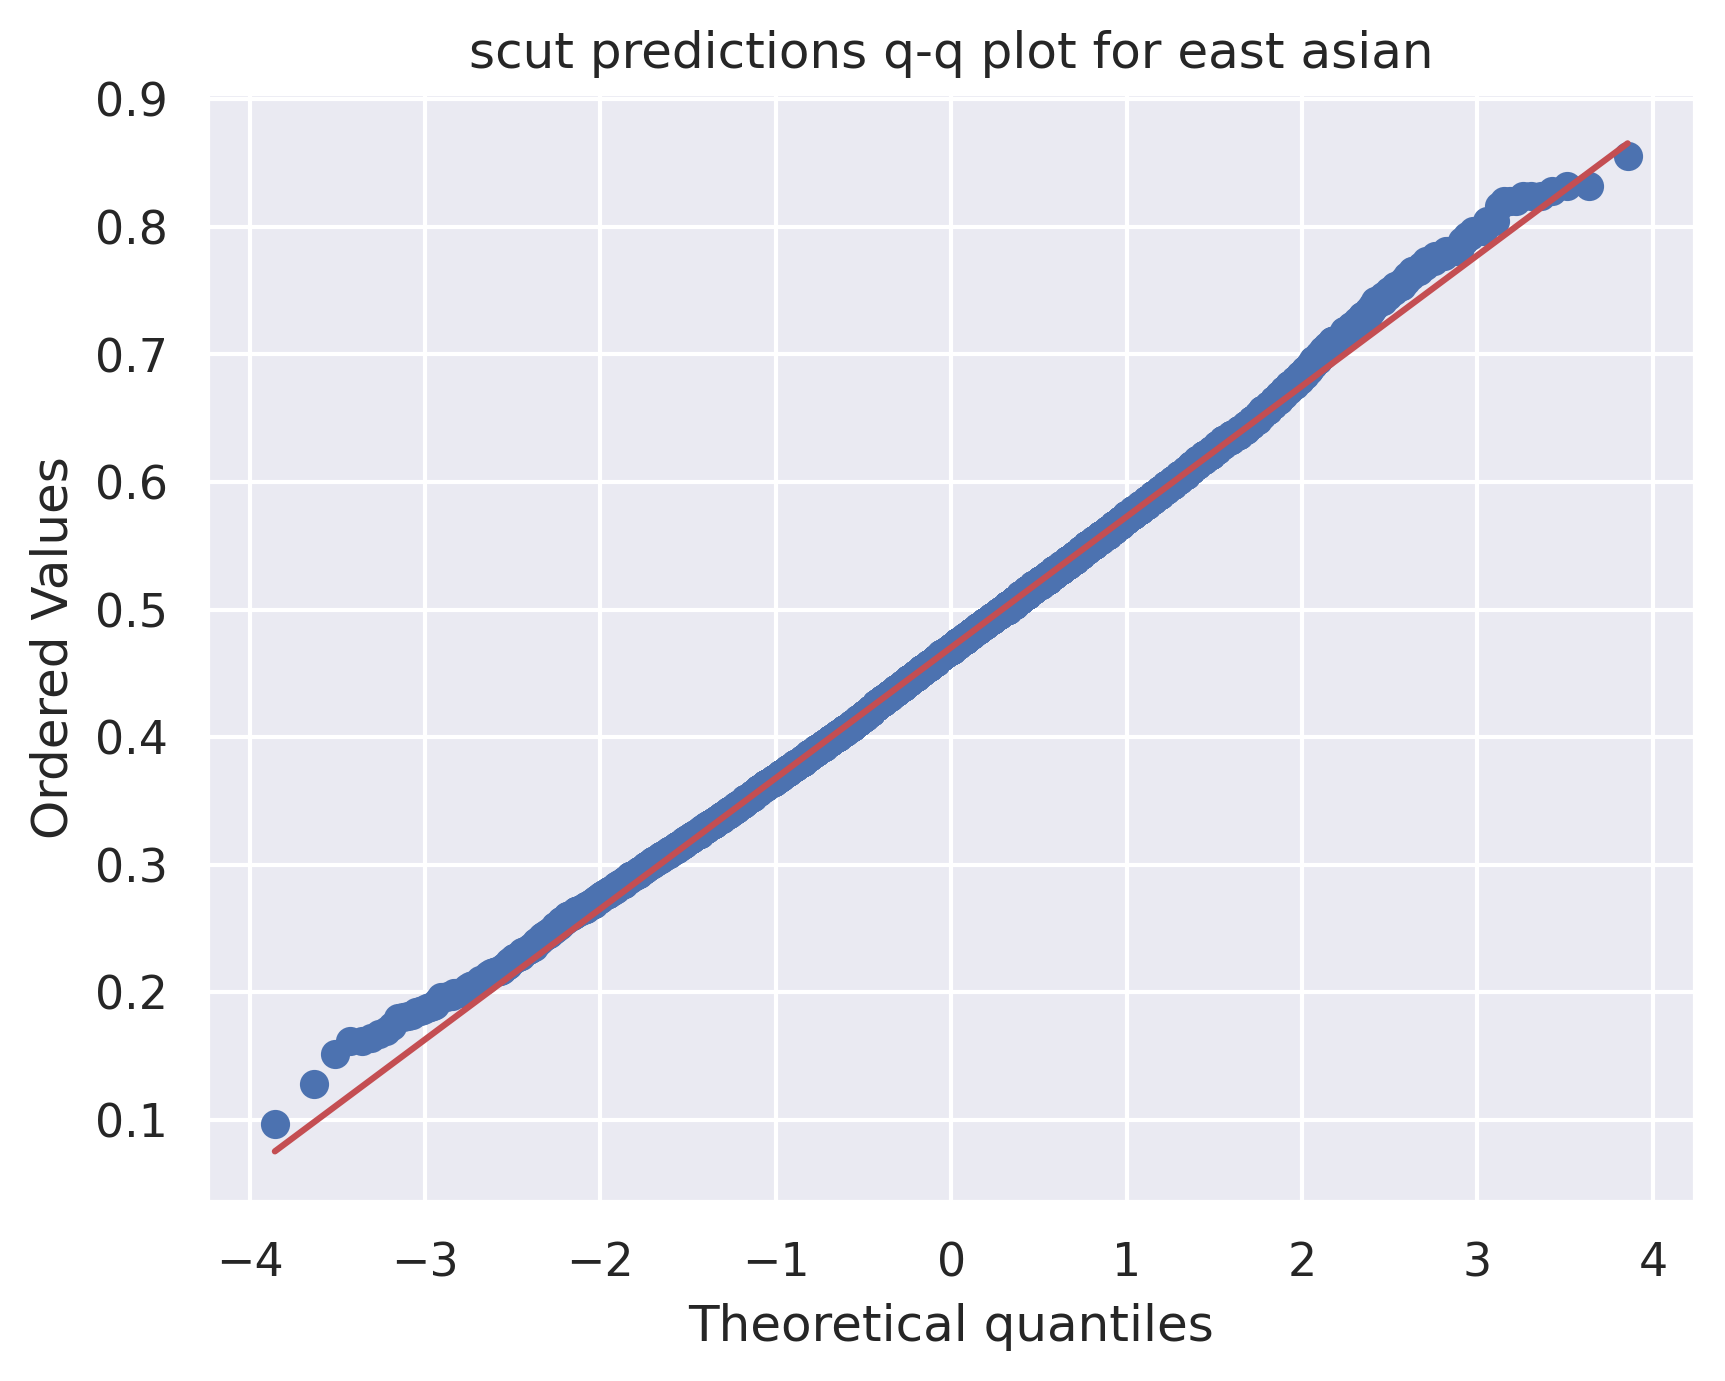

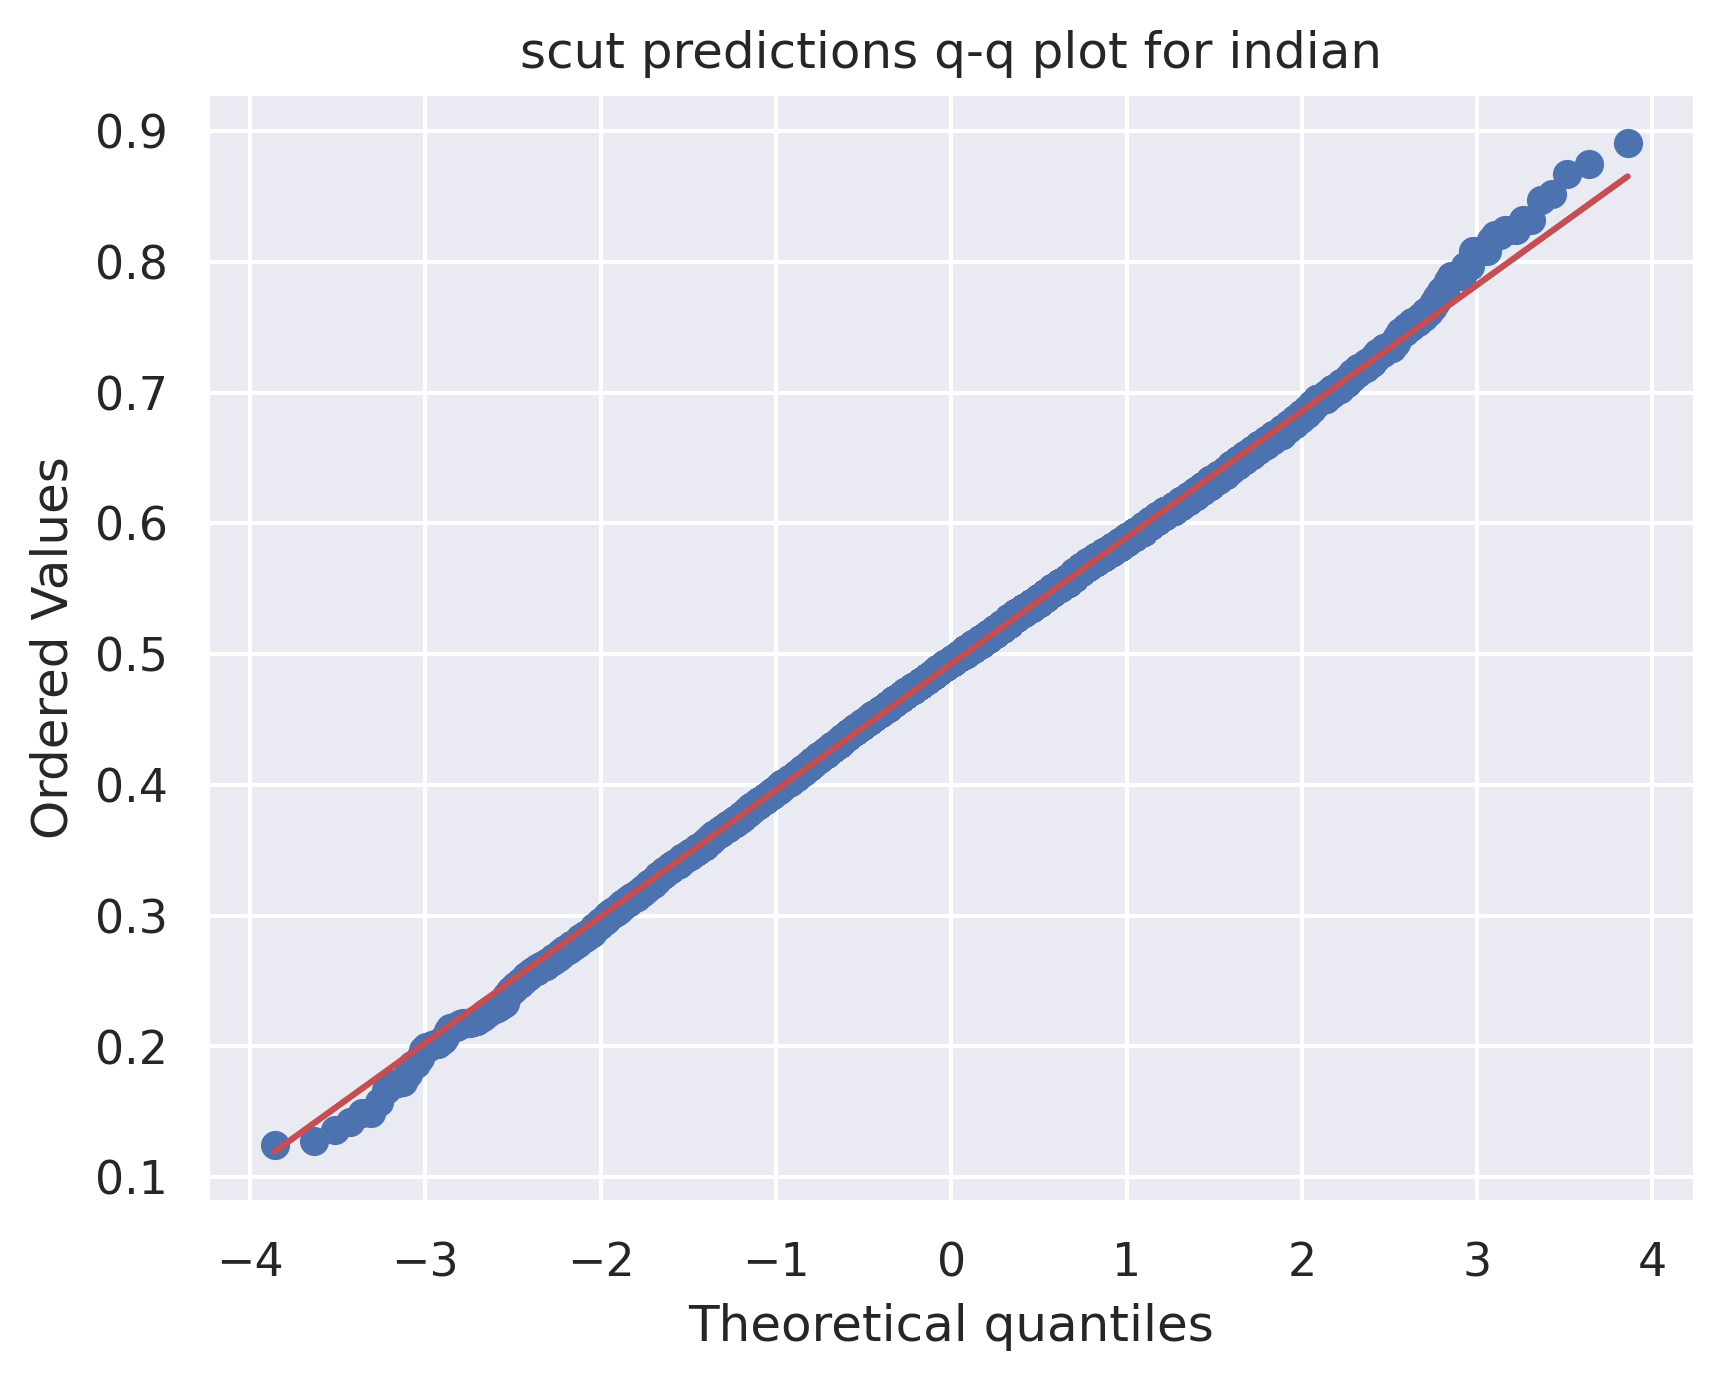

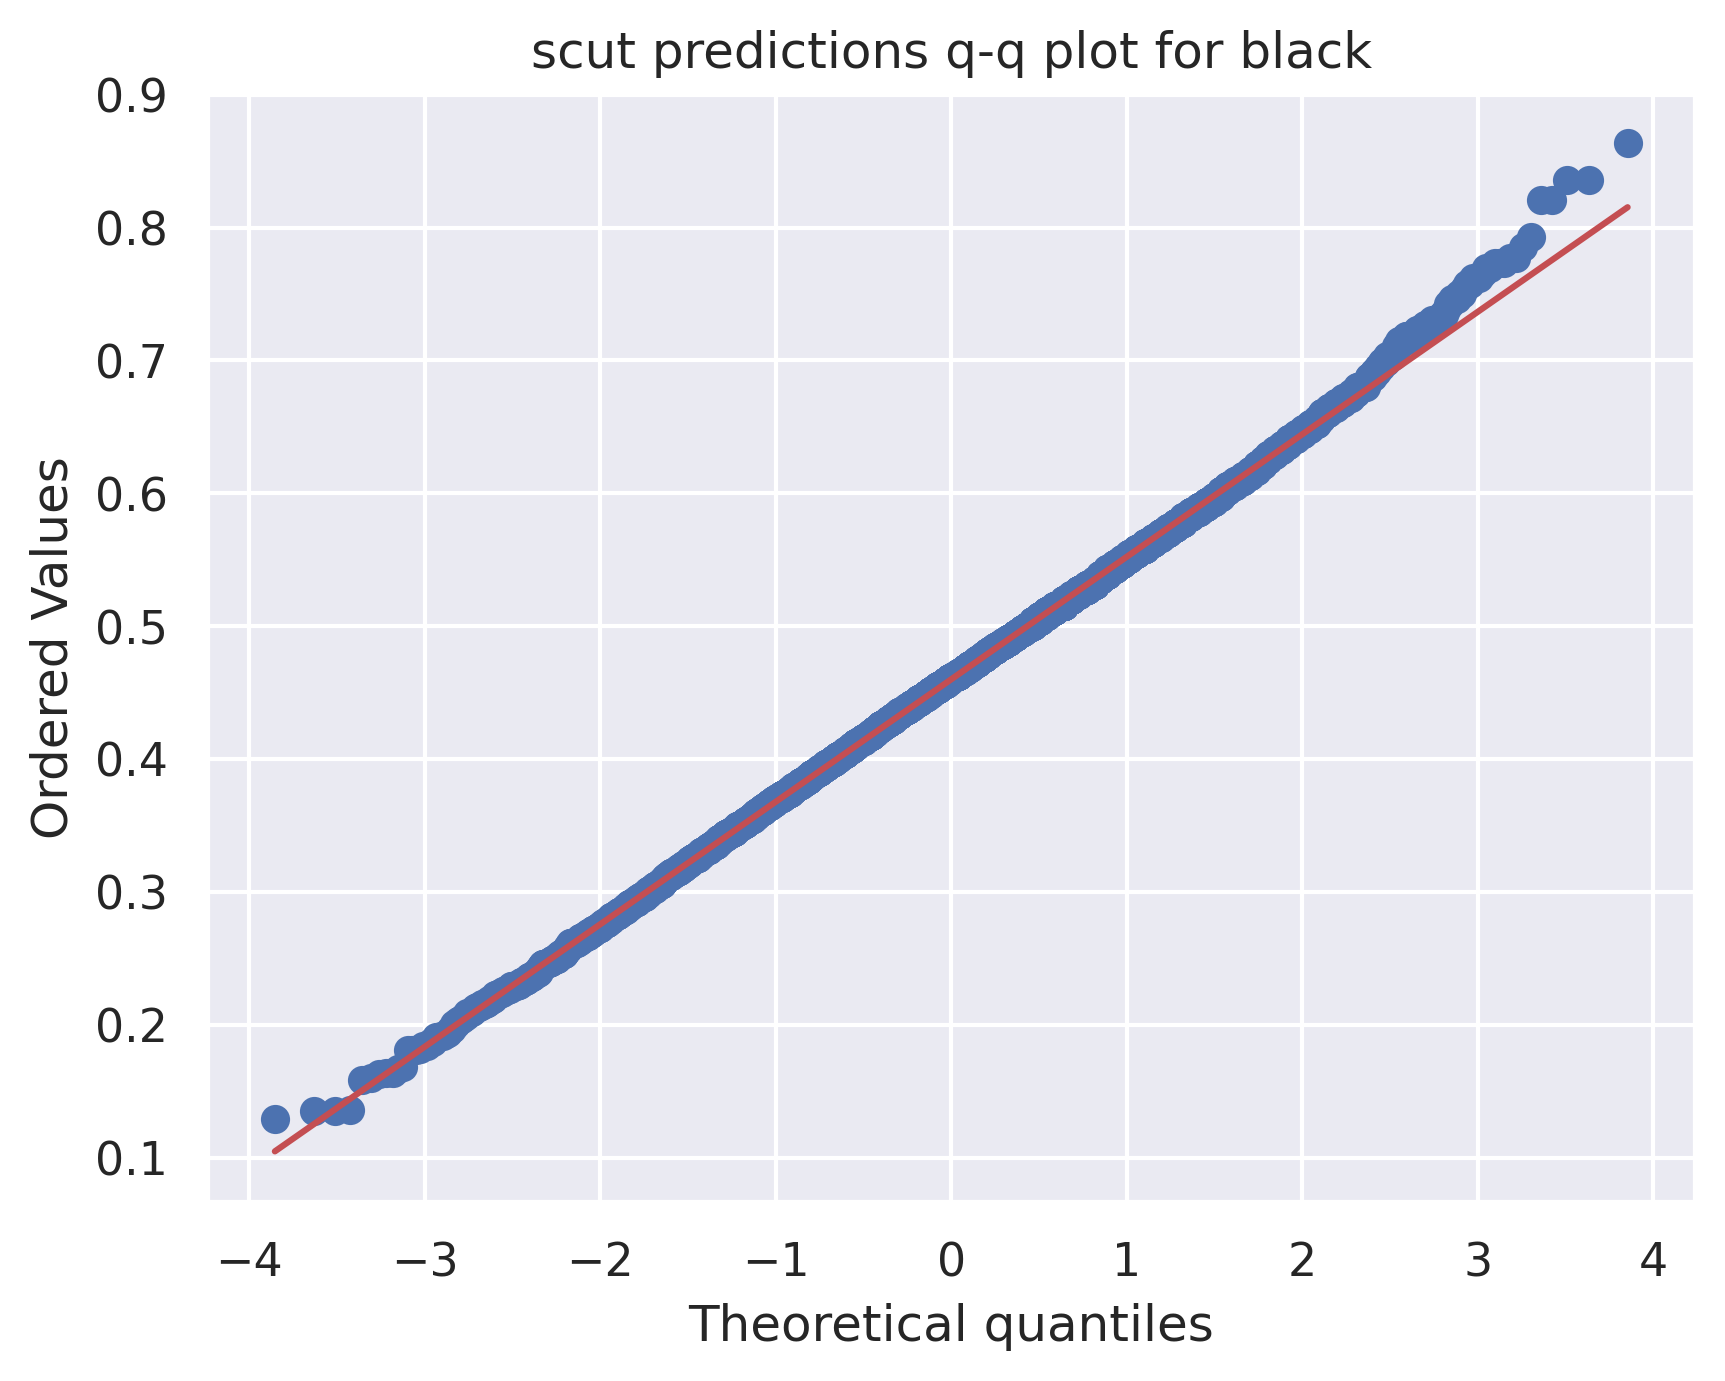

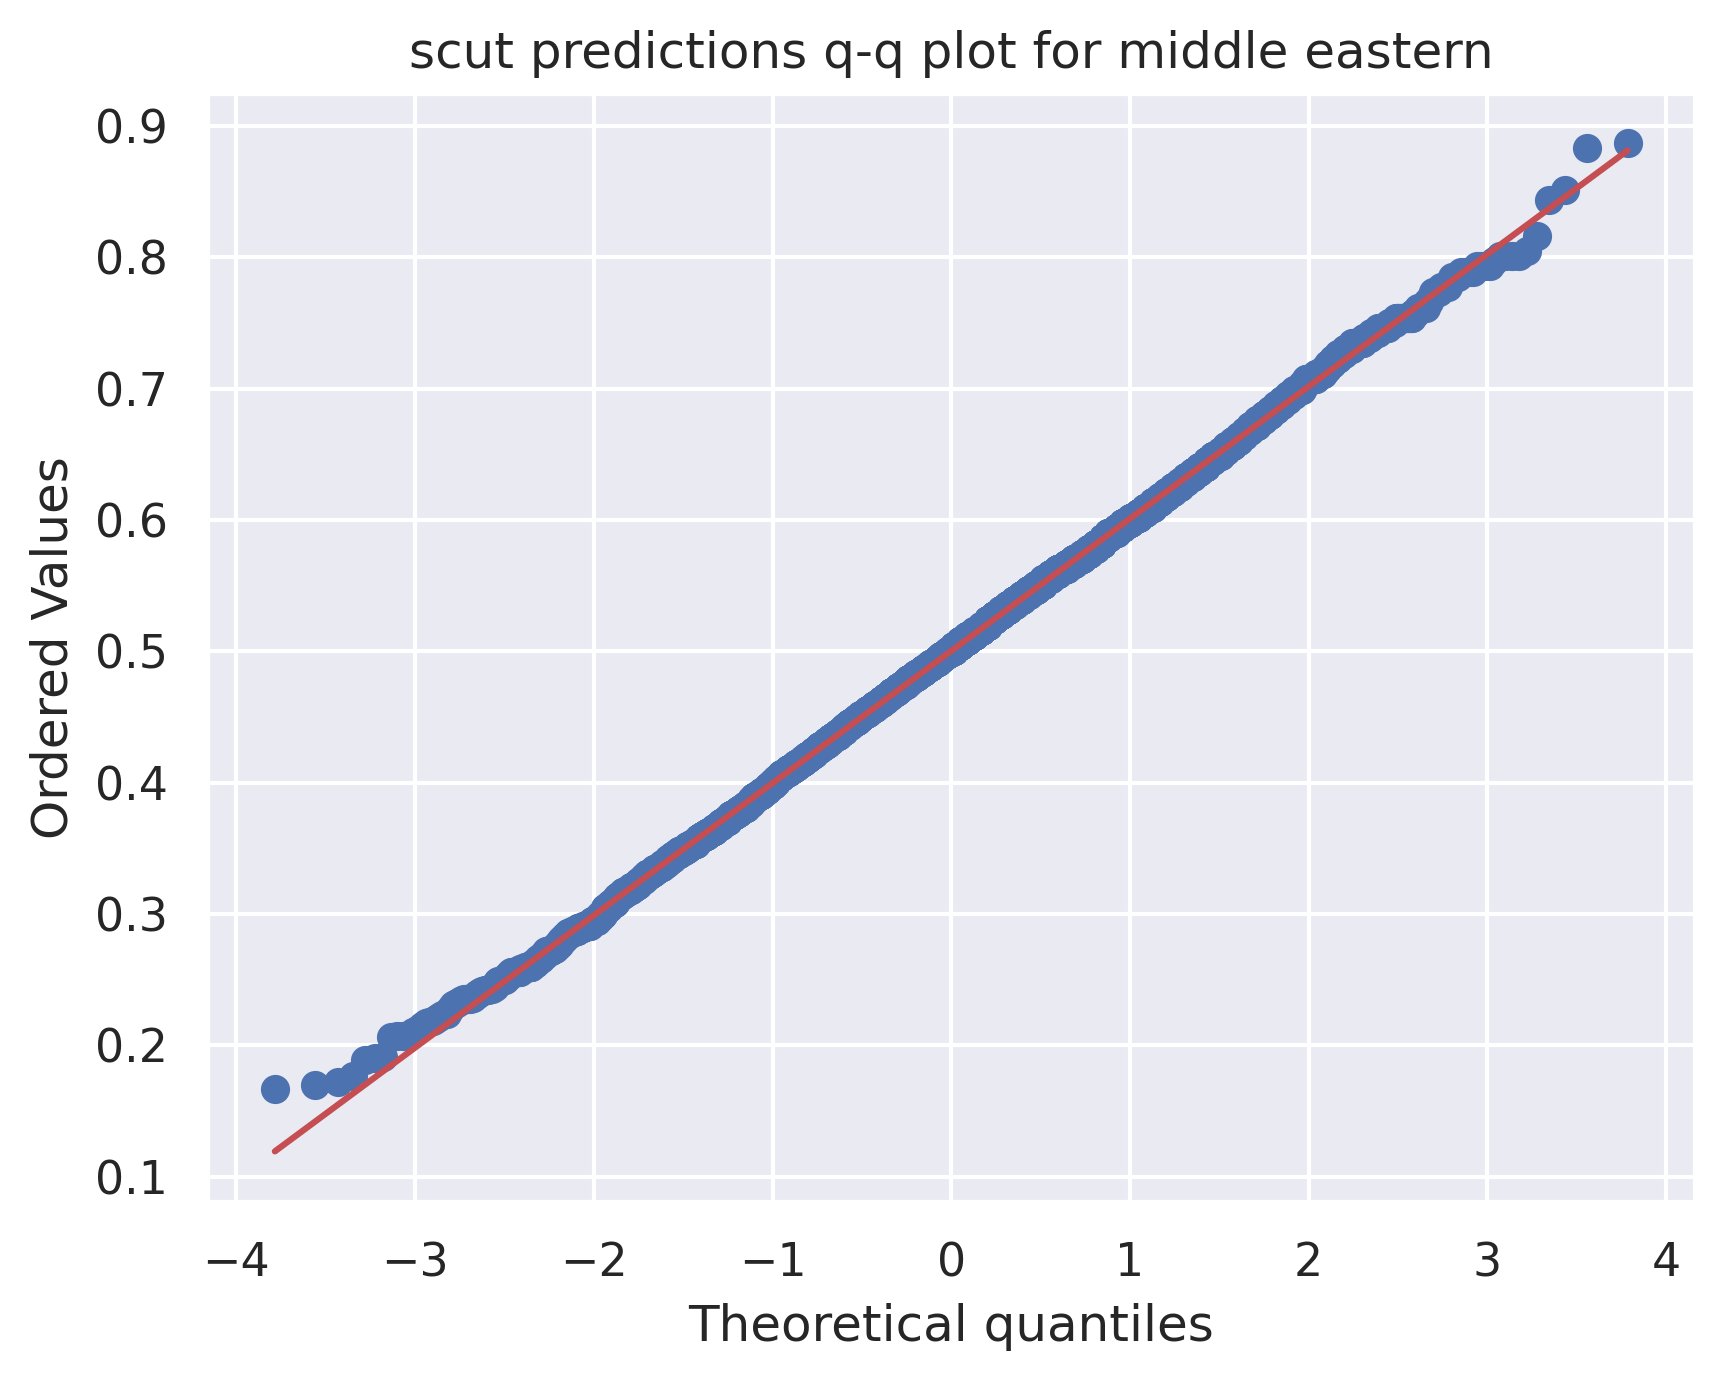

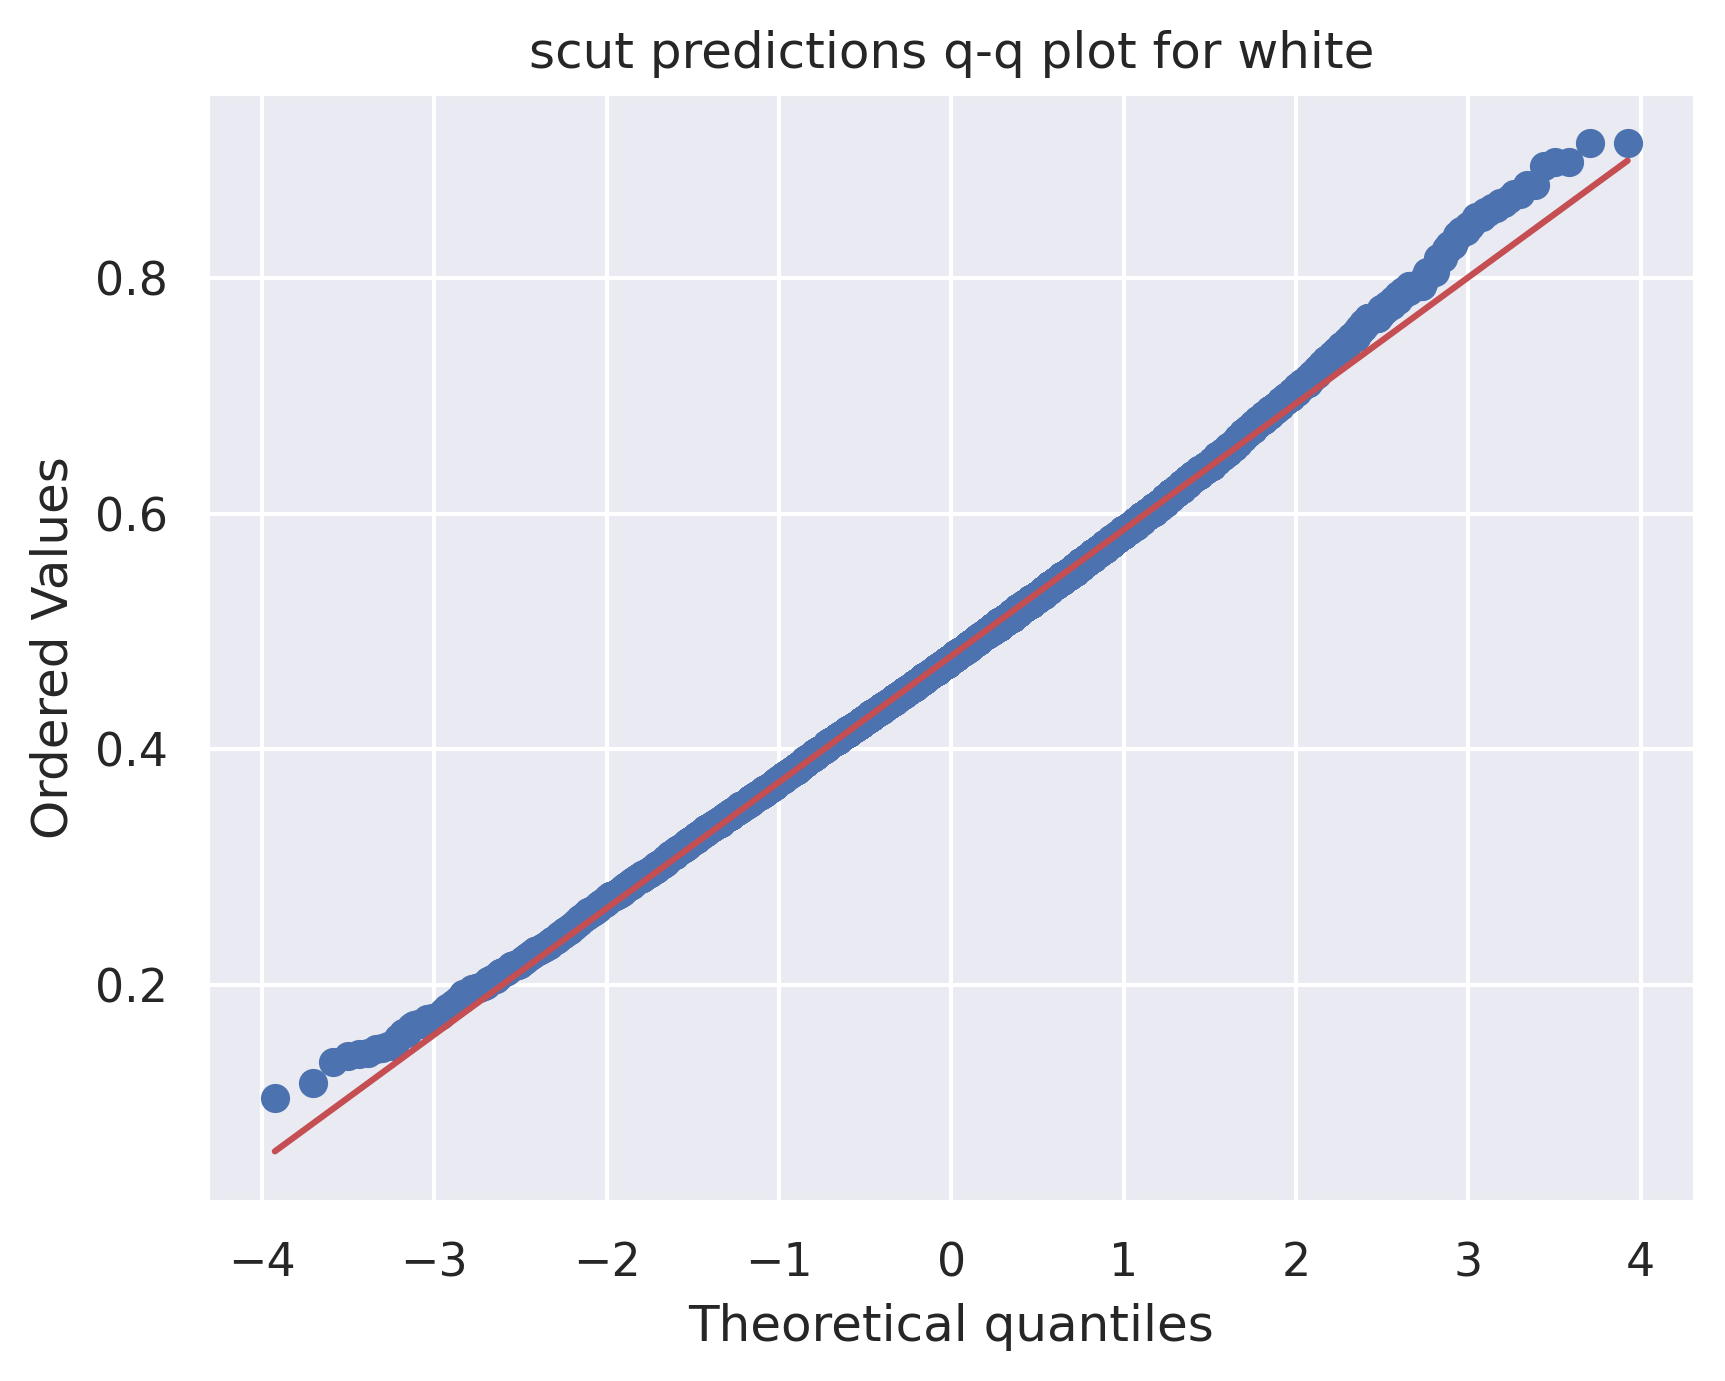

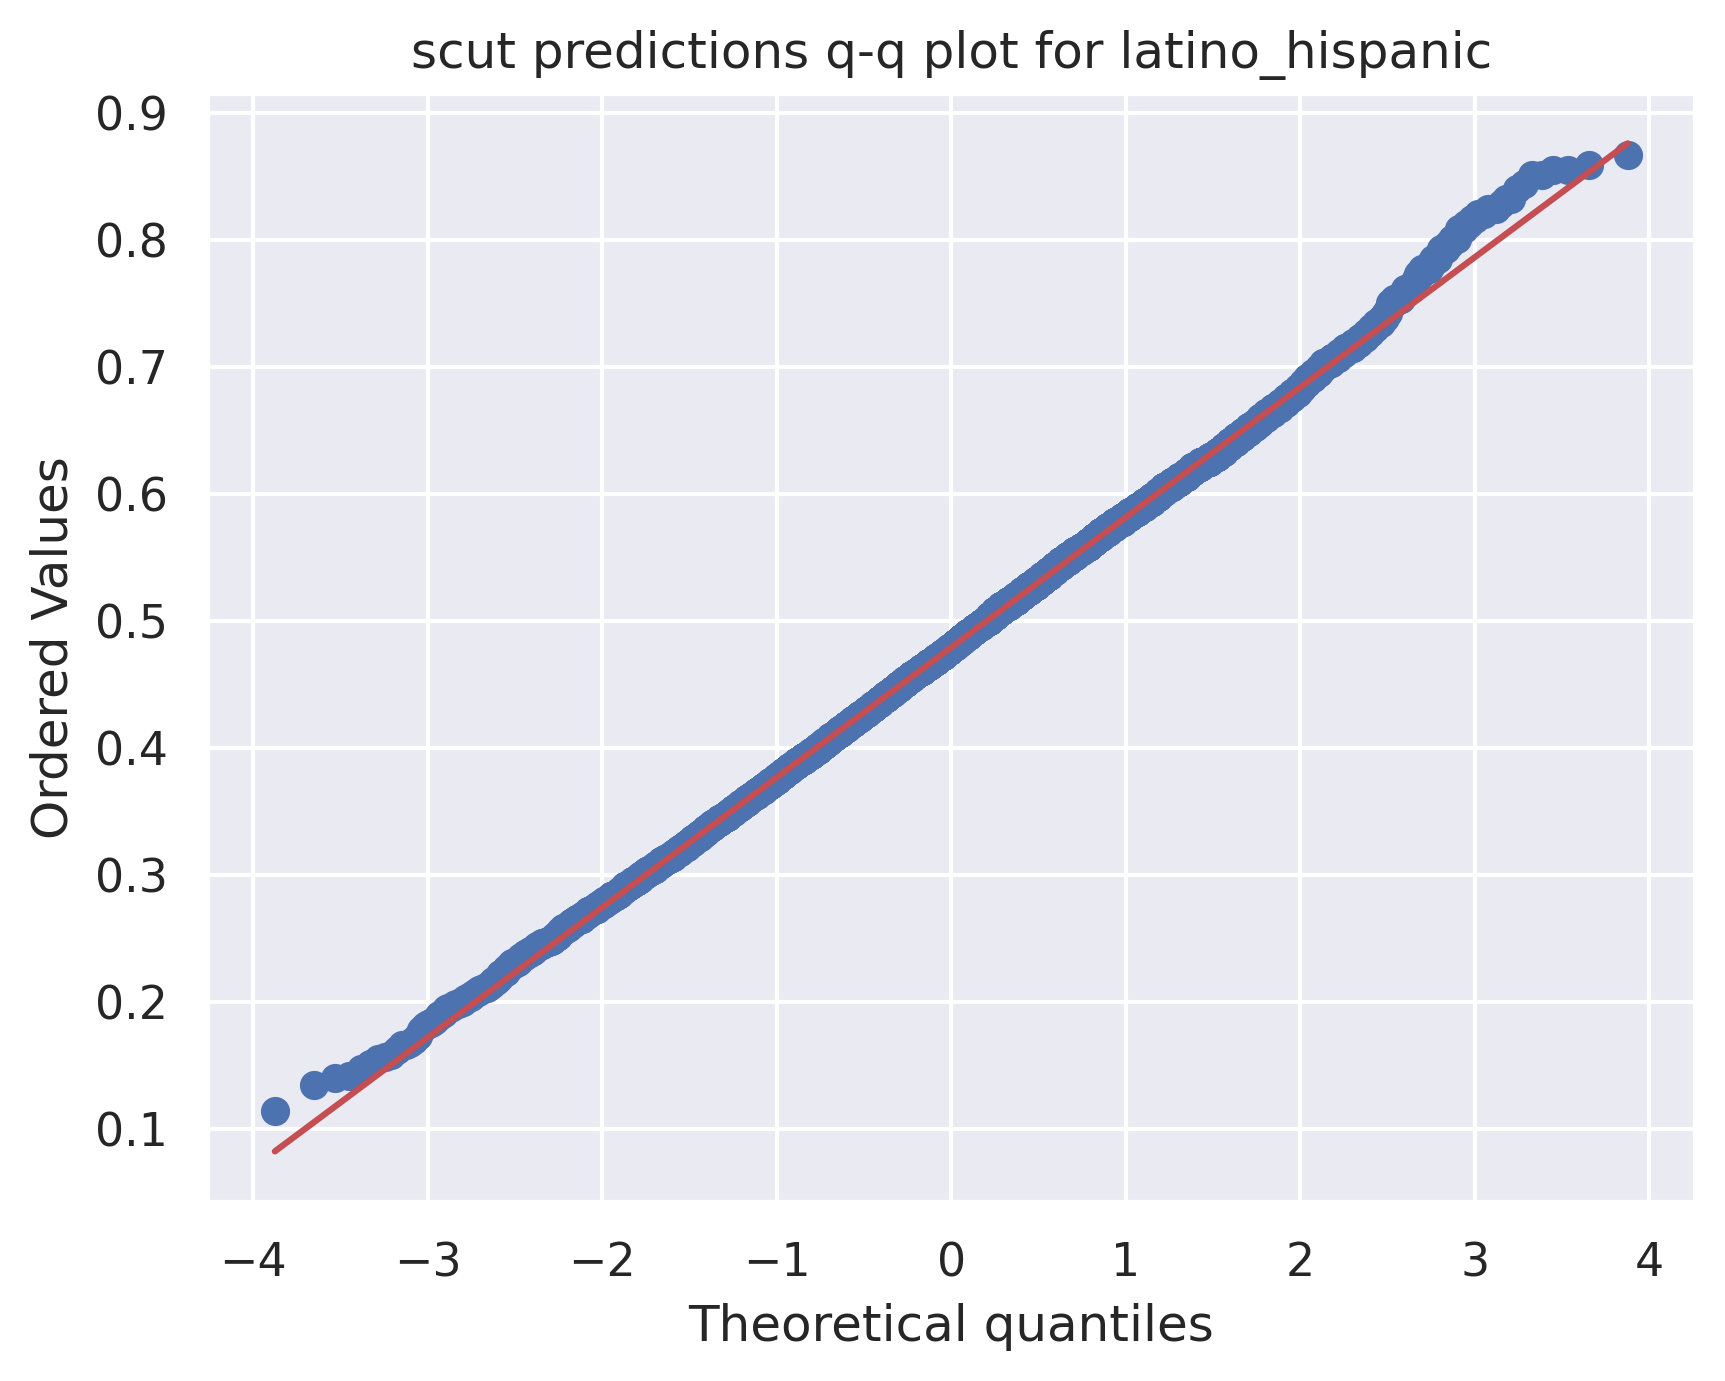

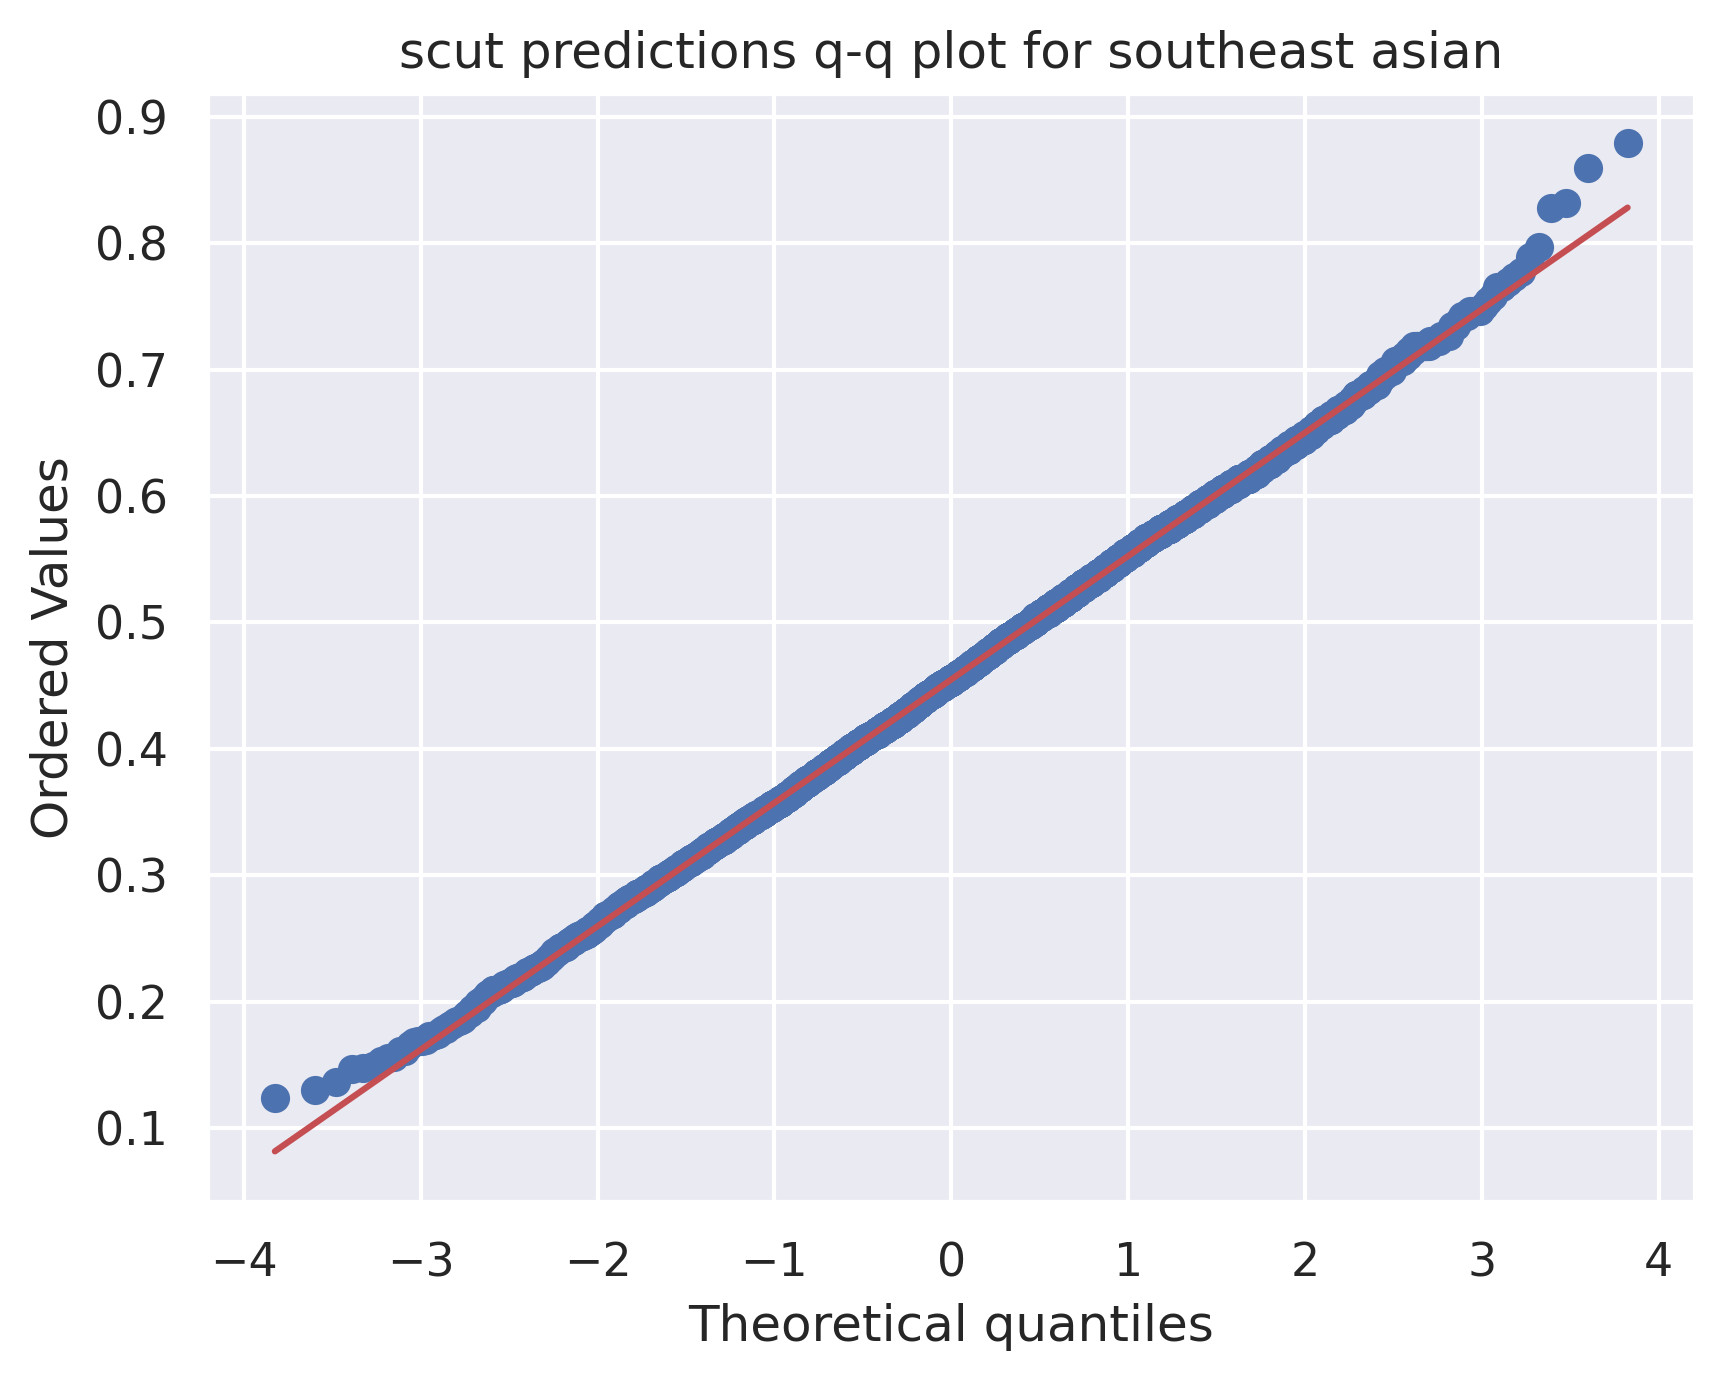

In [24]:
for race in df['race'].unique():
    stats.probplot(df.loc[df.race == race, 'scut_predictions'], dist="norm", plot=plt)
    plt.title(f'scut predictions q-q plot for {race}')
    plt.show()

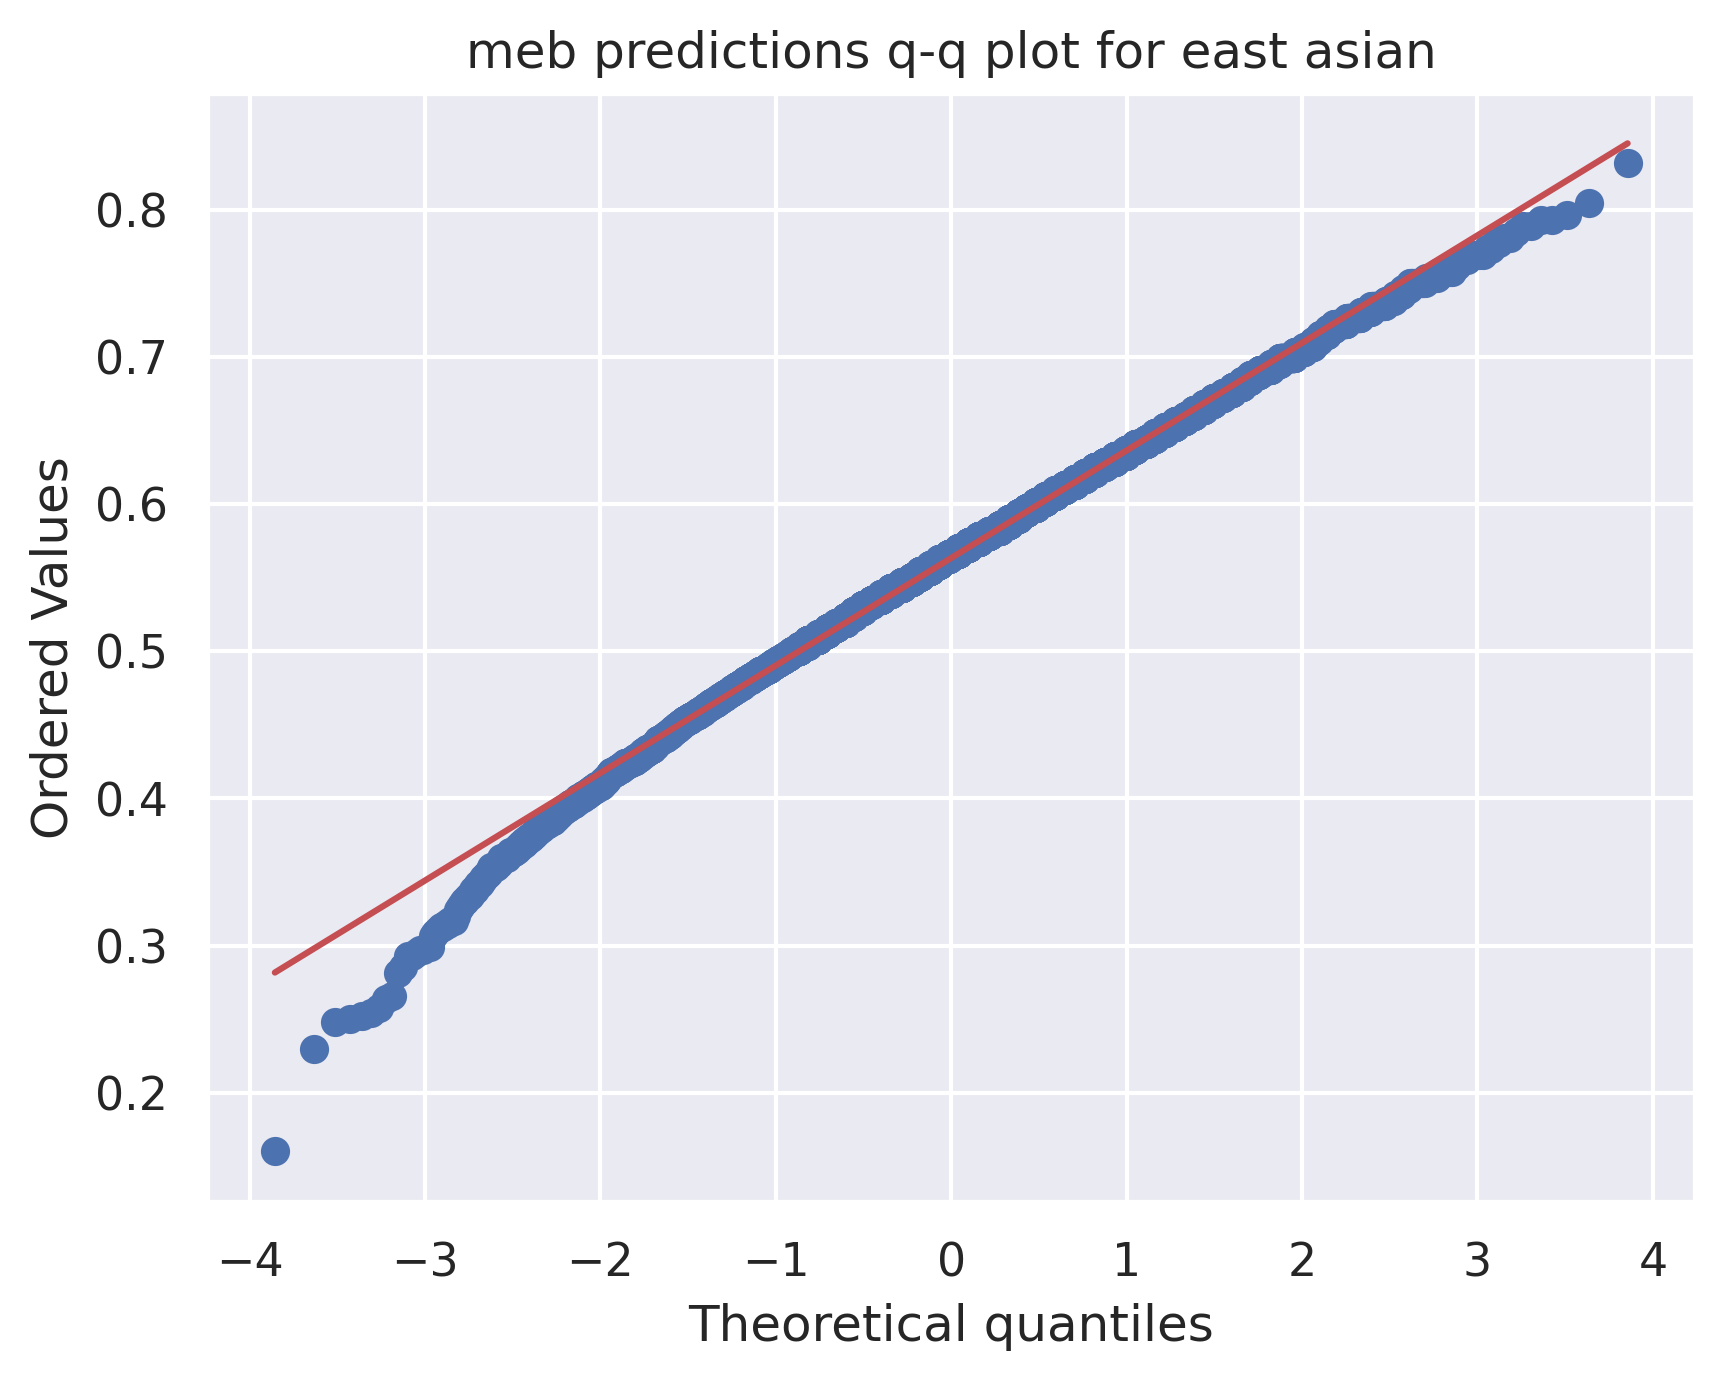

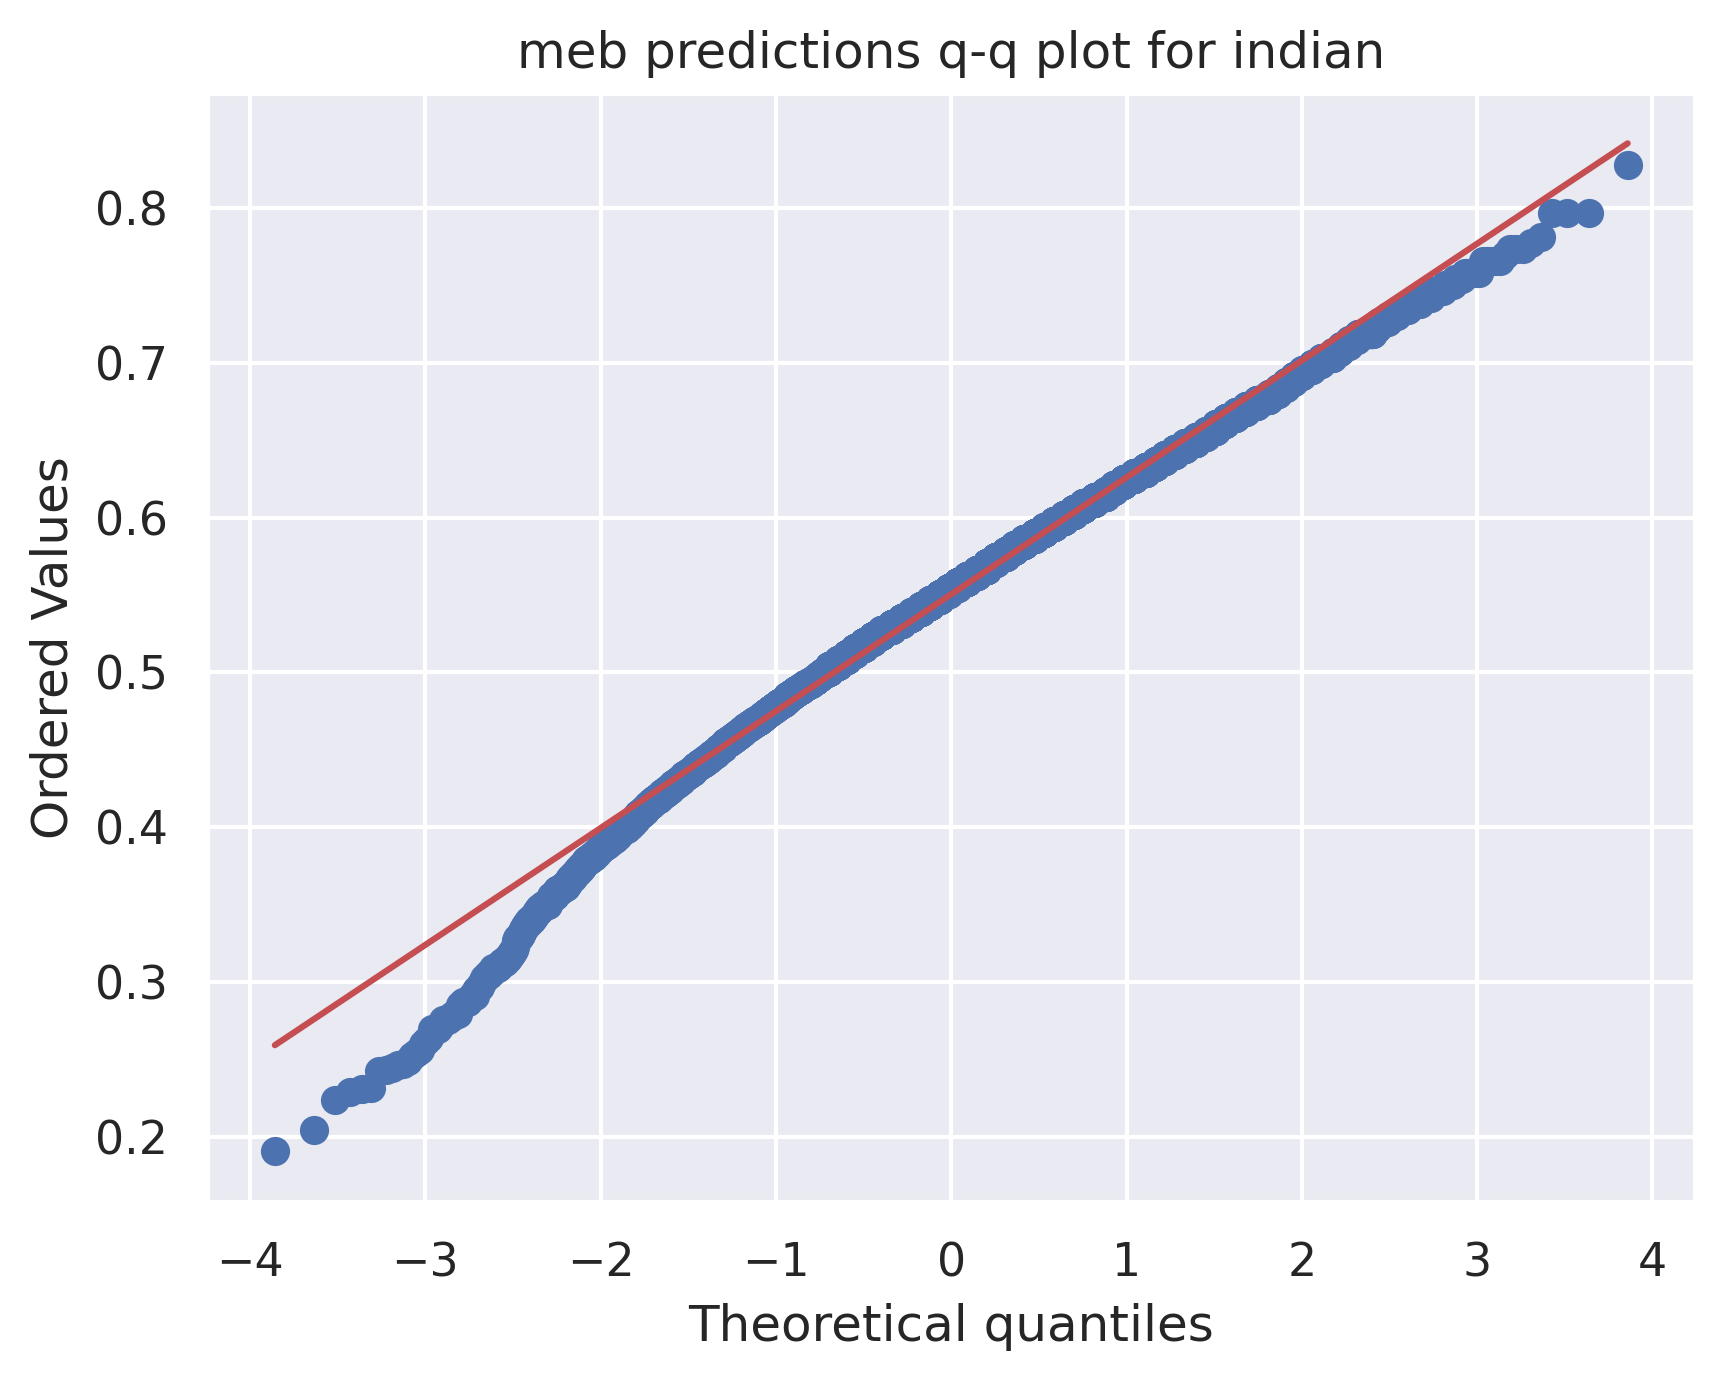

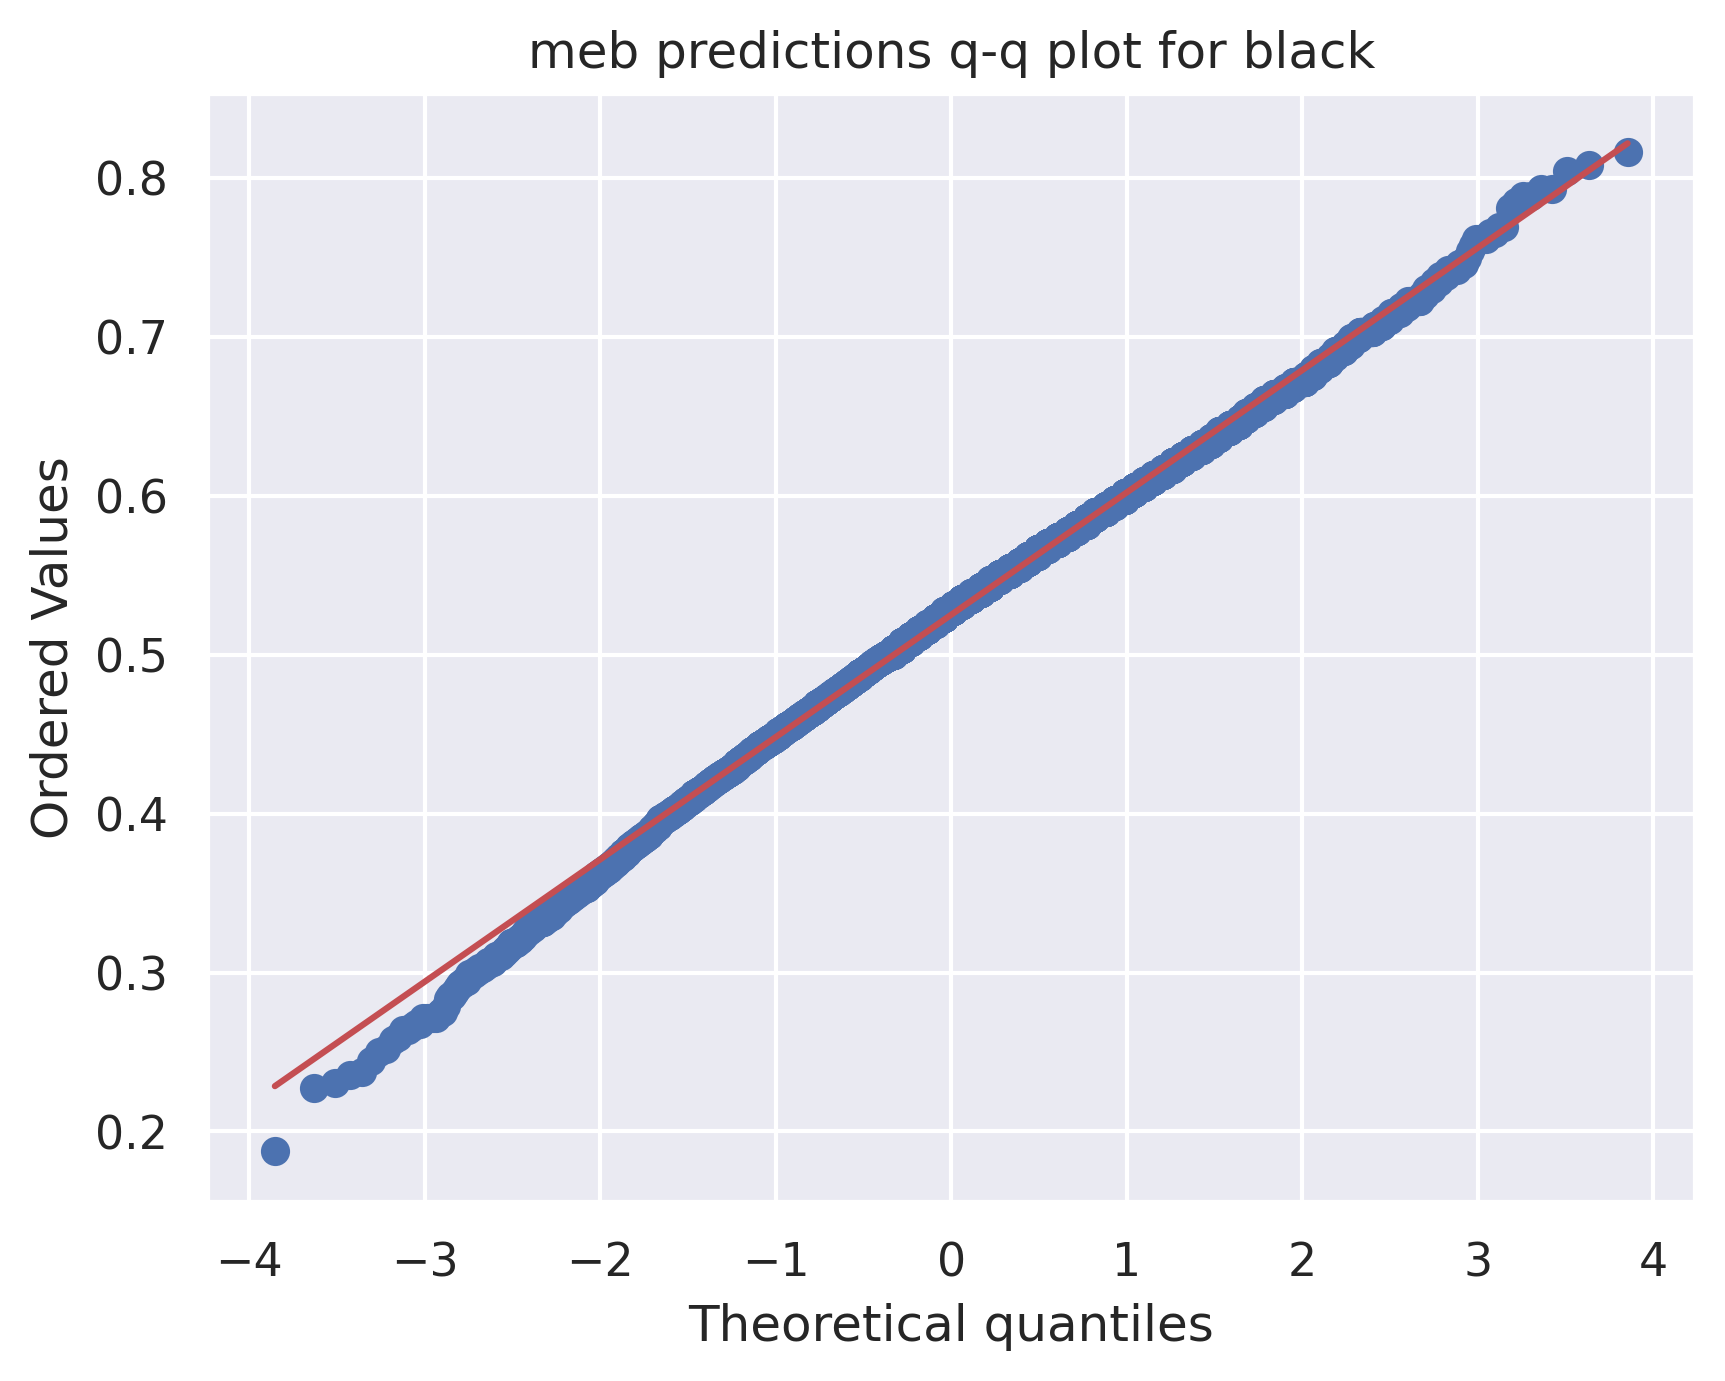

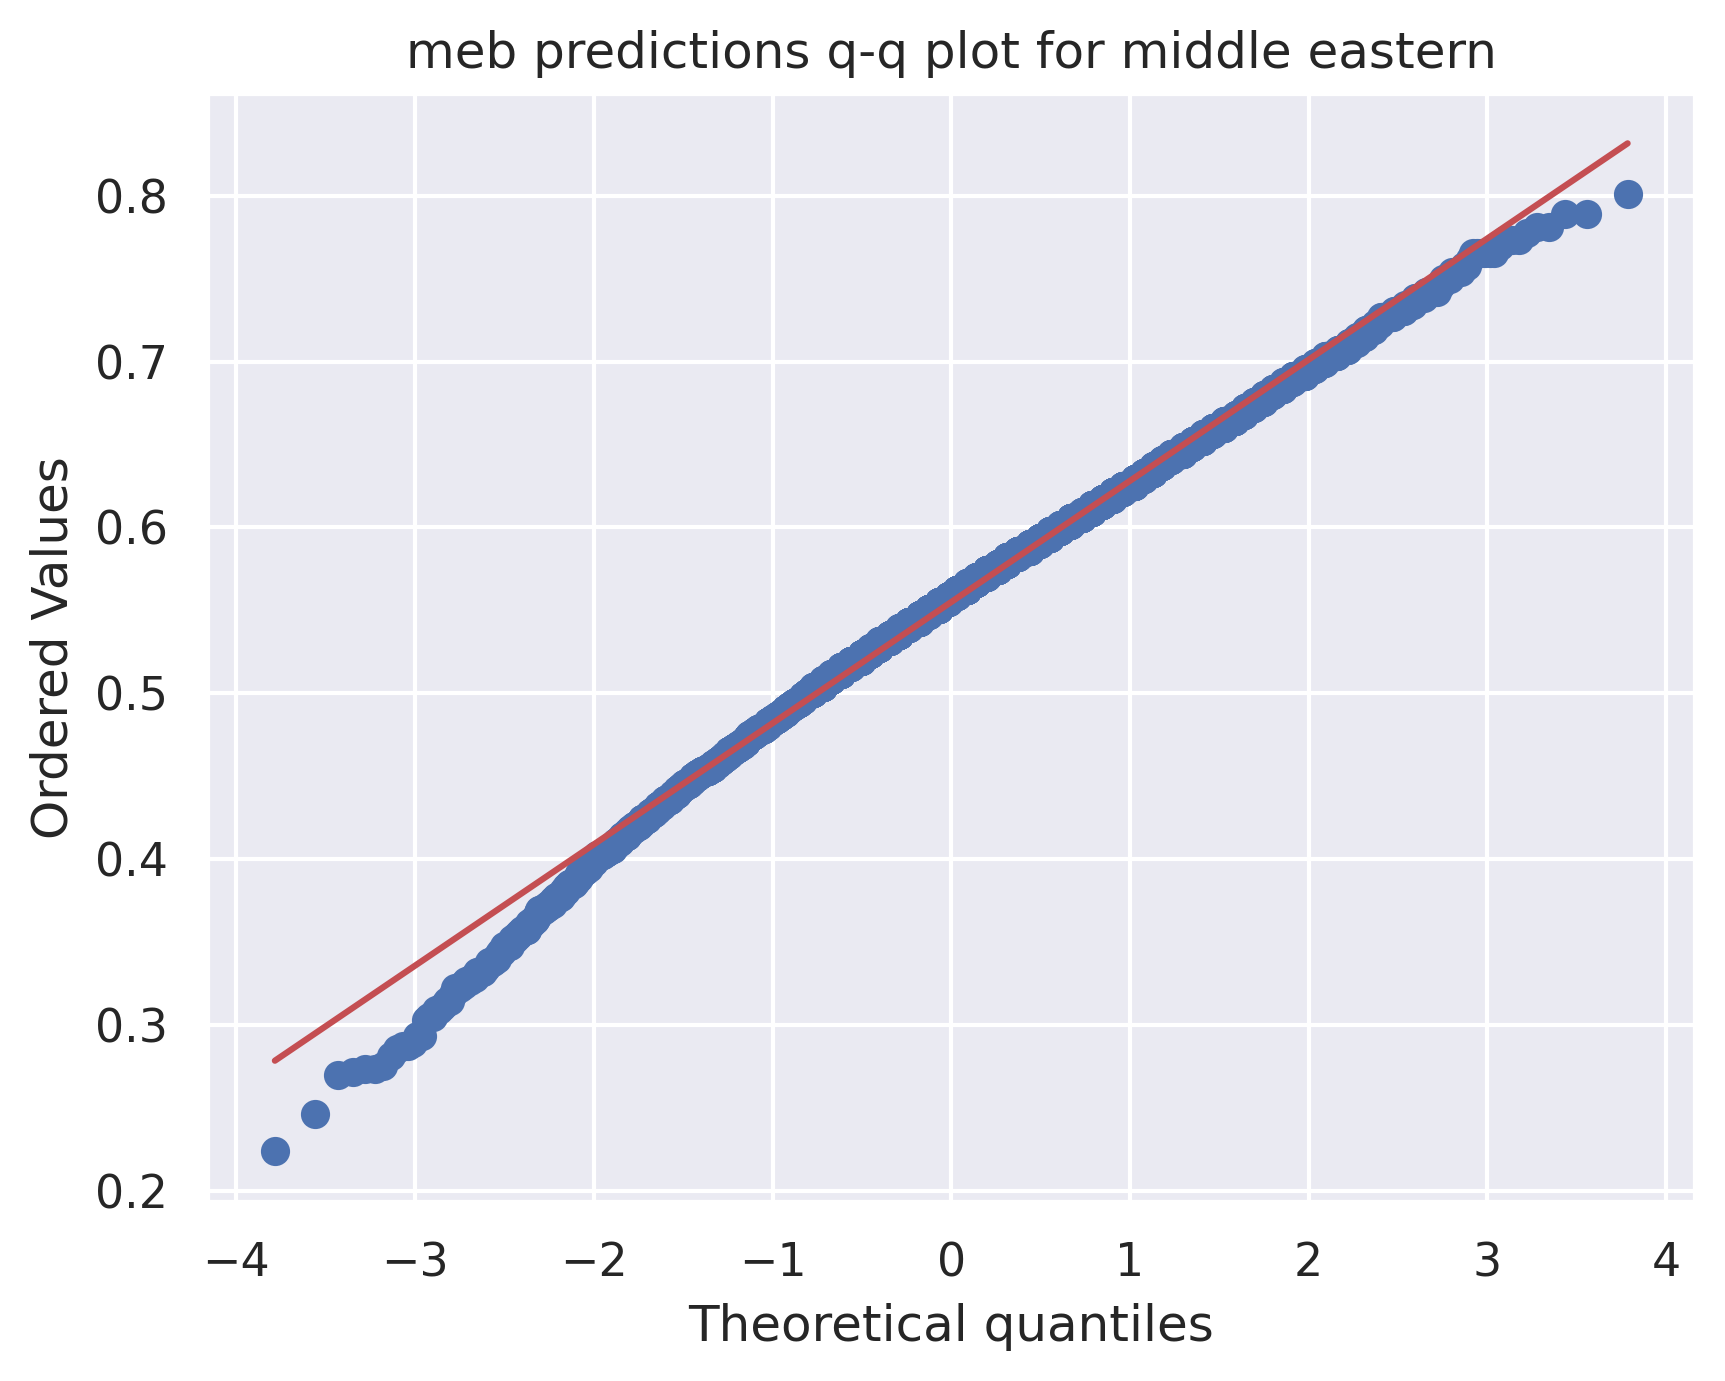

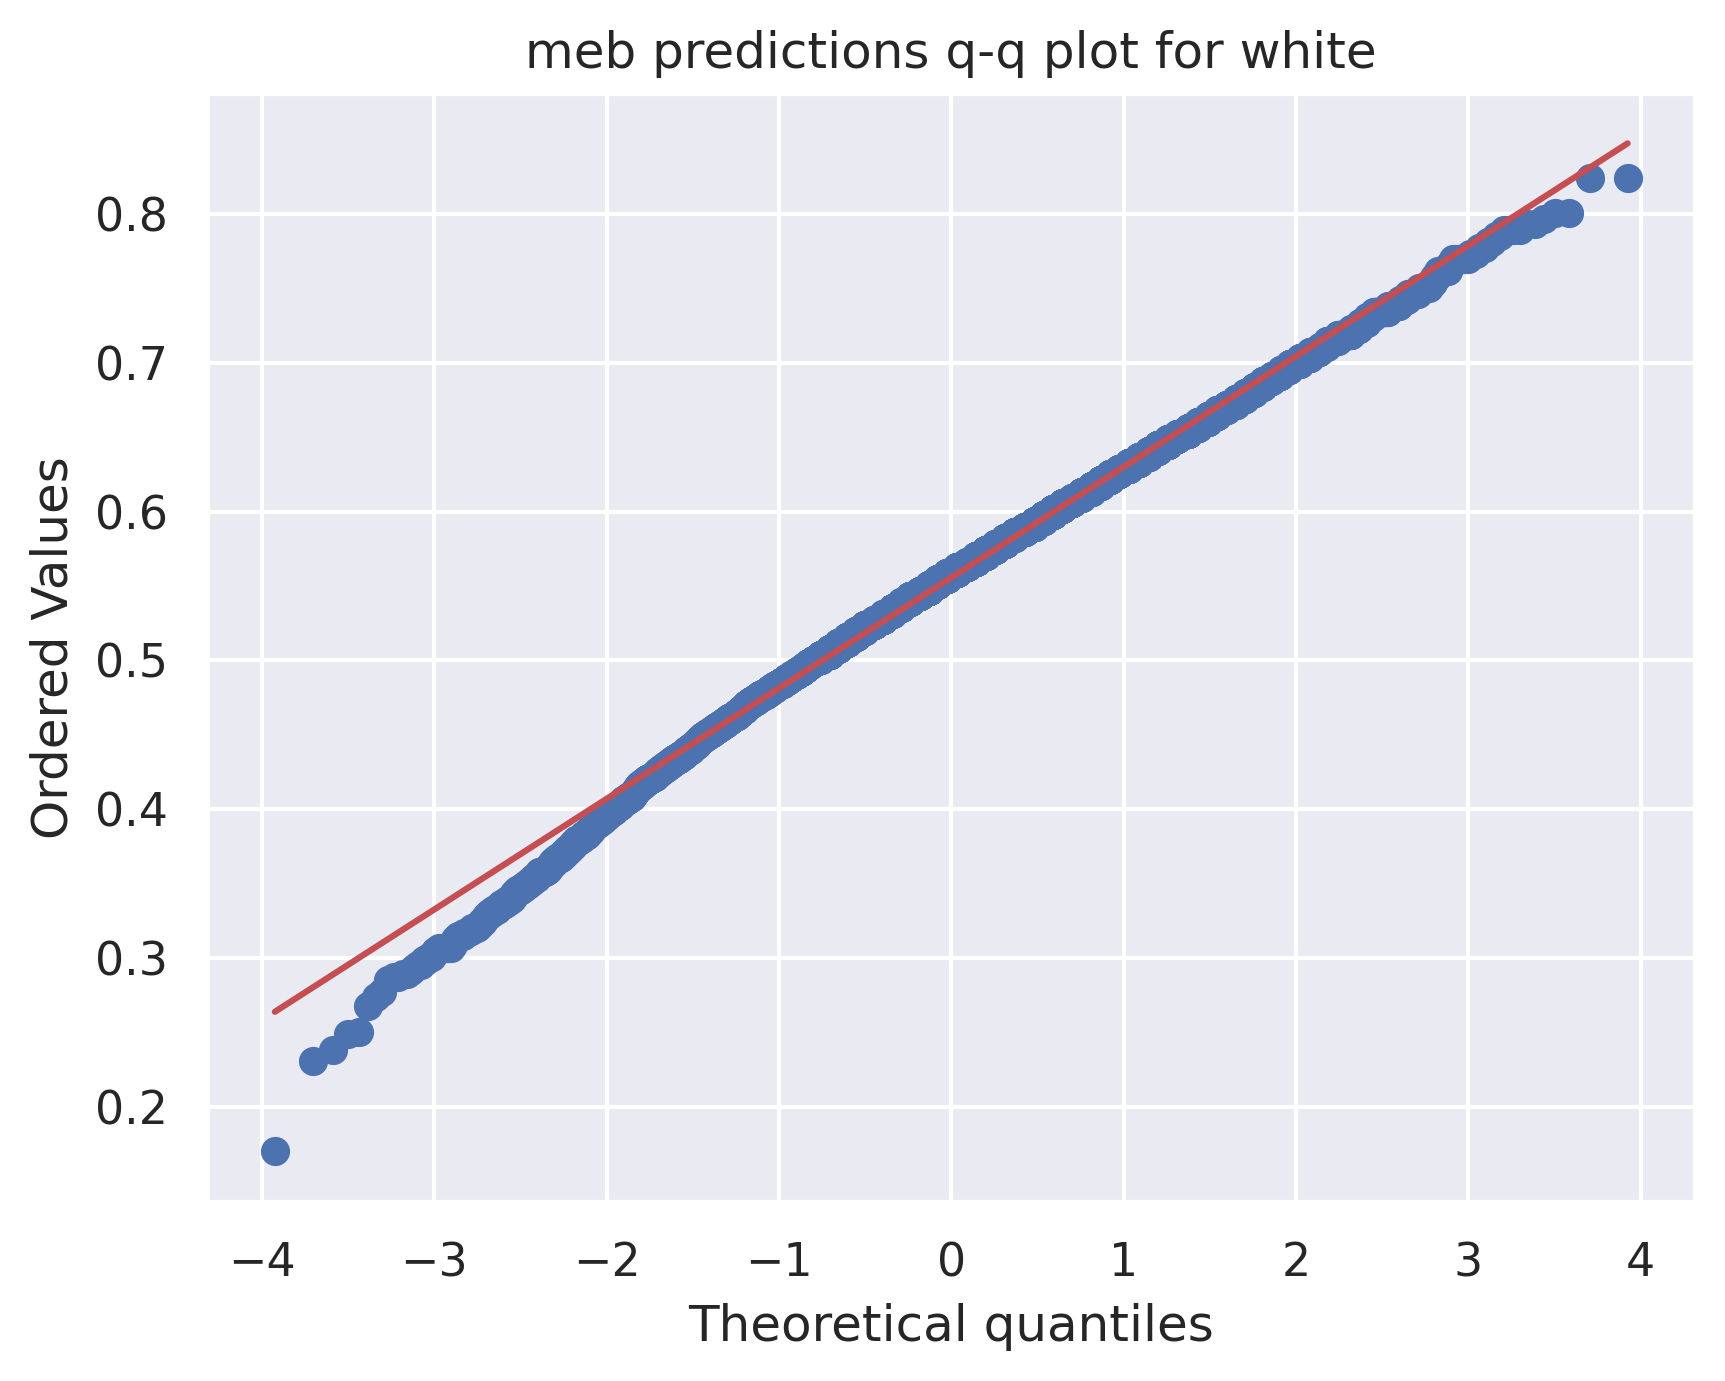

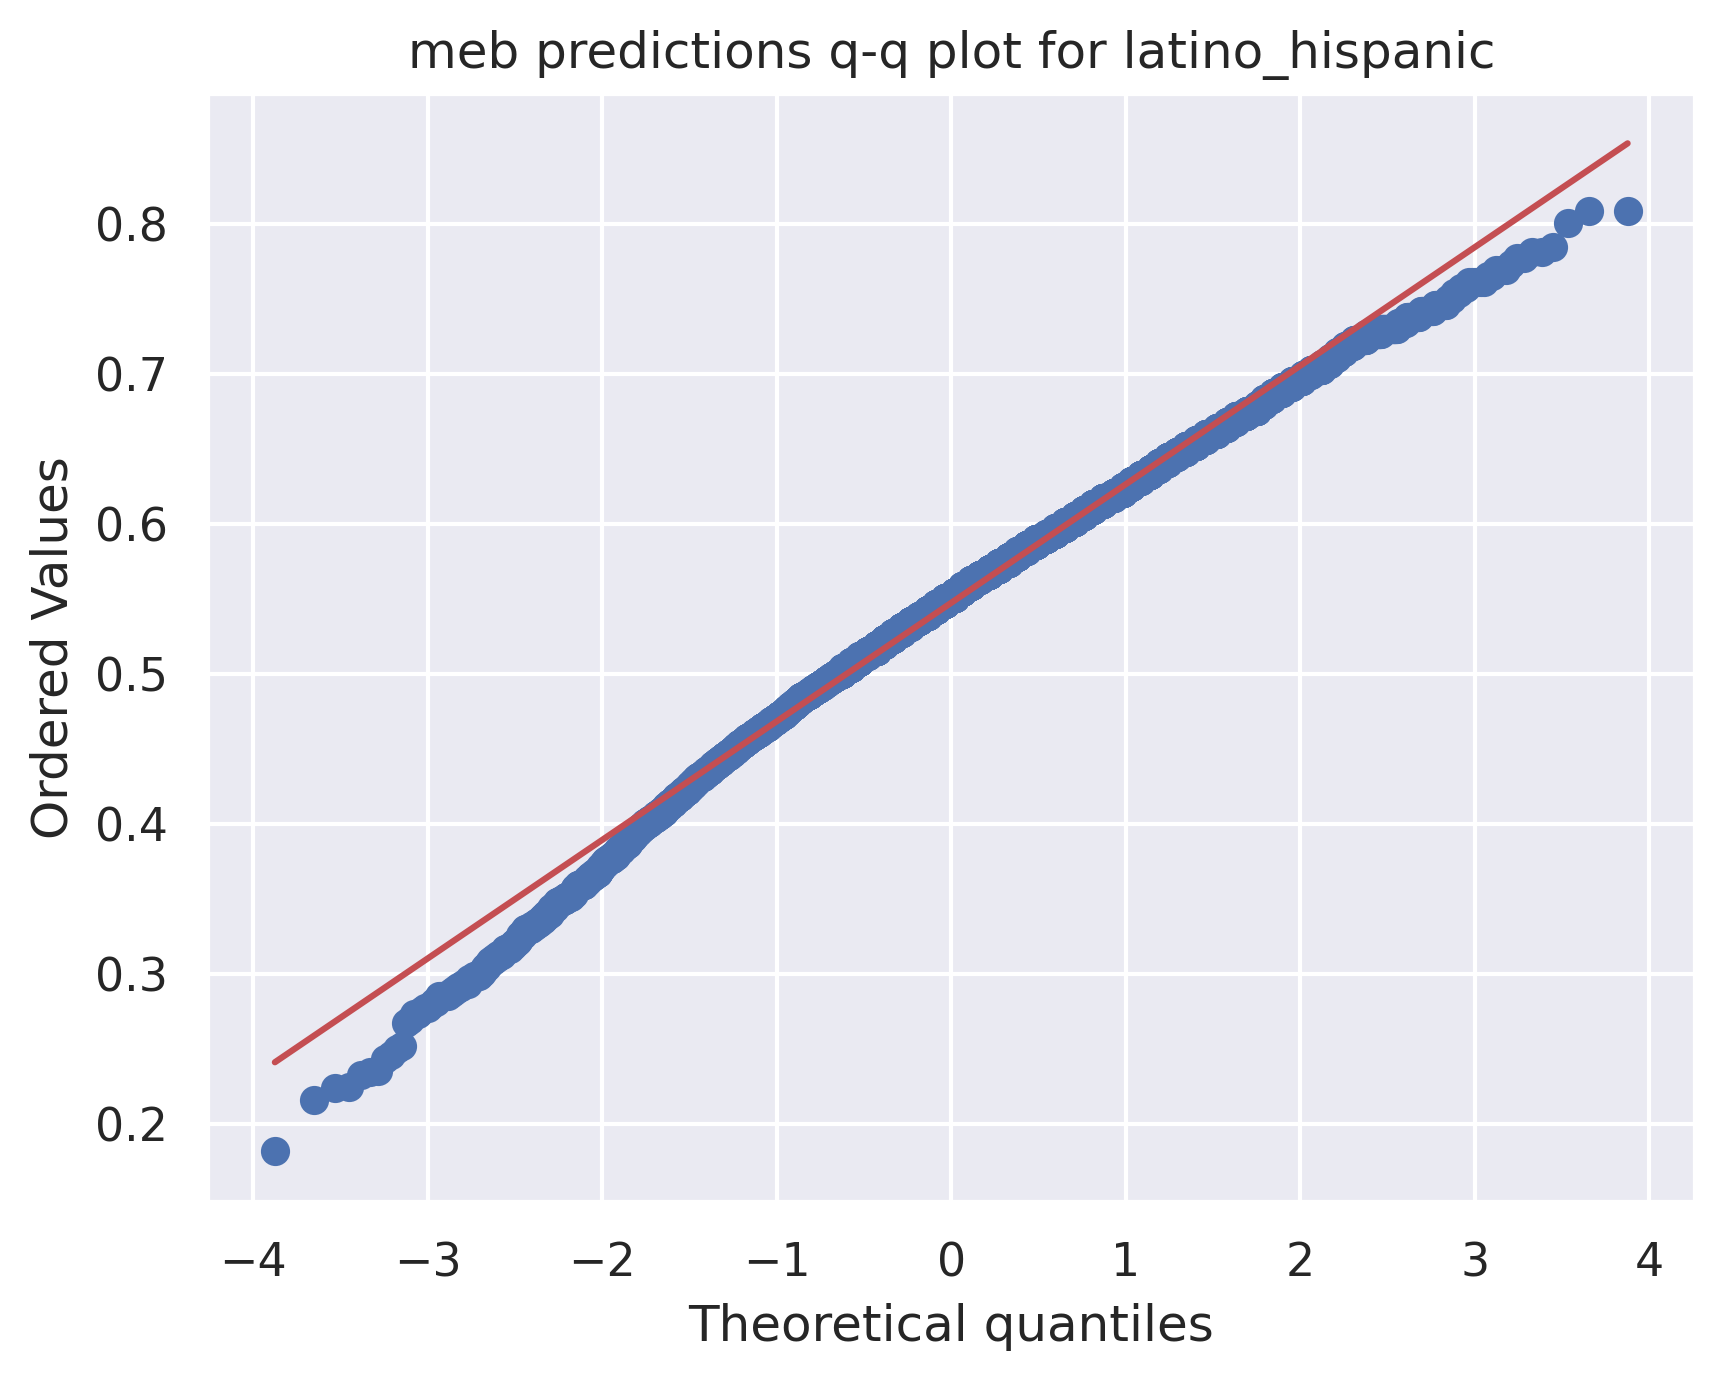

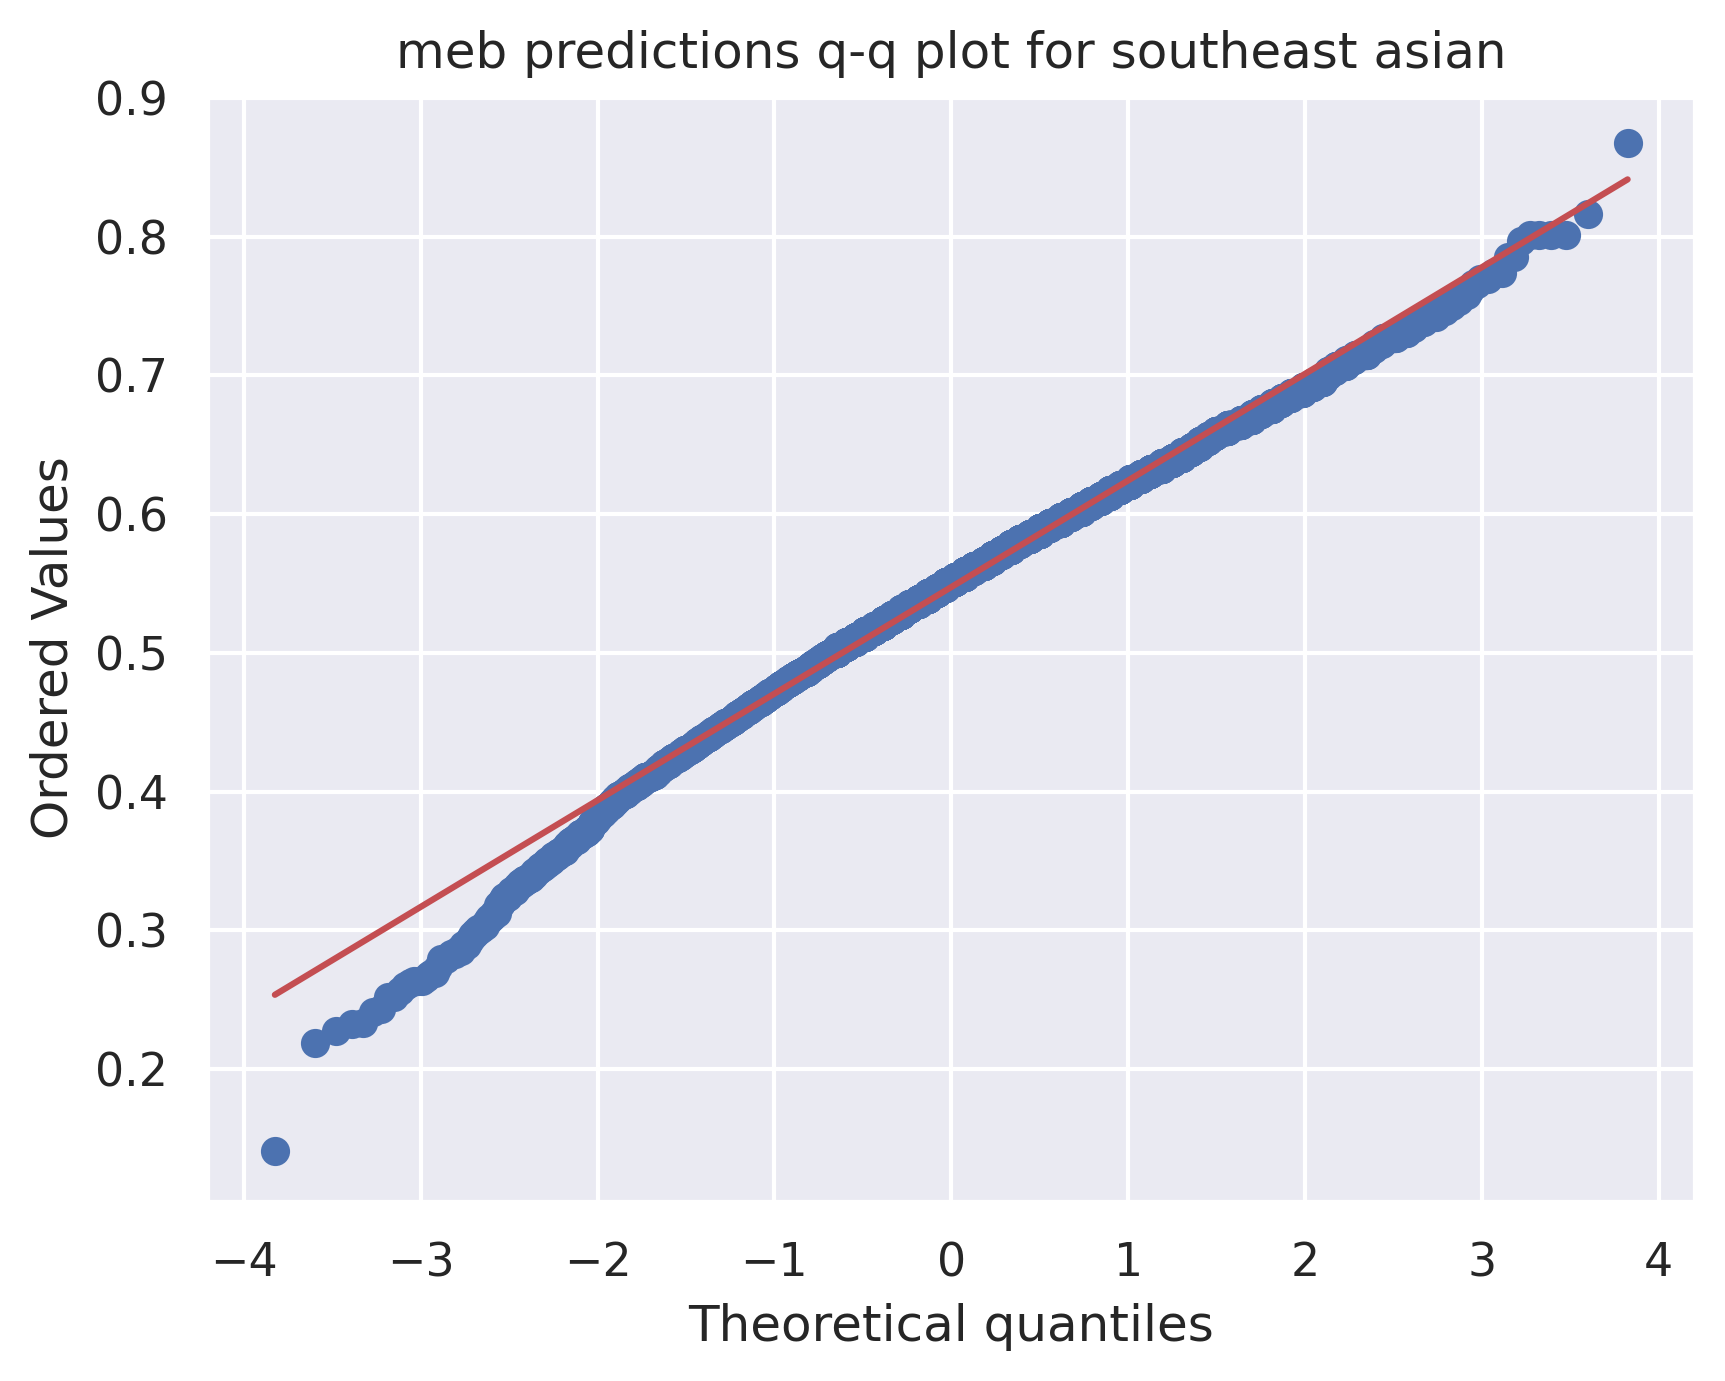

In [25]:
for race in df['race'].unique():
    stats.probplot(df.loc[df.race == race, 'meb_predictions'], dist="norm", plot=plt)
    plt.title(f'meb predictions q-q plot for {race}')
    plt.show()

In [26]:
stats.kruskal(df.loc[df.race == 'white', 'scut_predictions'], df.loc[df.race == 'latino_hispanic', 'scut_predictions'], df.loc[df.race == 'indian', 'scut_predictions'], df.loc[df.race == 'east asian', 'scut_predictions'], df.loc[df.race == 'black', 'scut_predictions'], df.loc[df.race == 'southeast asian', 'scut_predictions'], df.loc[df.race == 'middle eastern', 'scut_predictions'])

KruskalResult(statistic=1675.7447064939536, pvalue=0.0)

<Axes: >

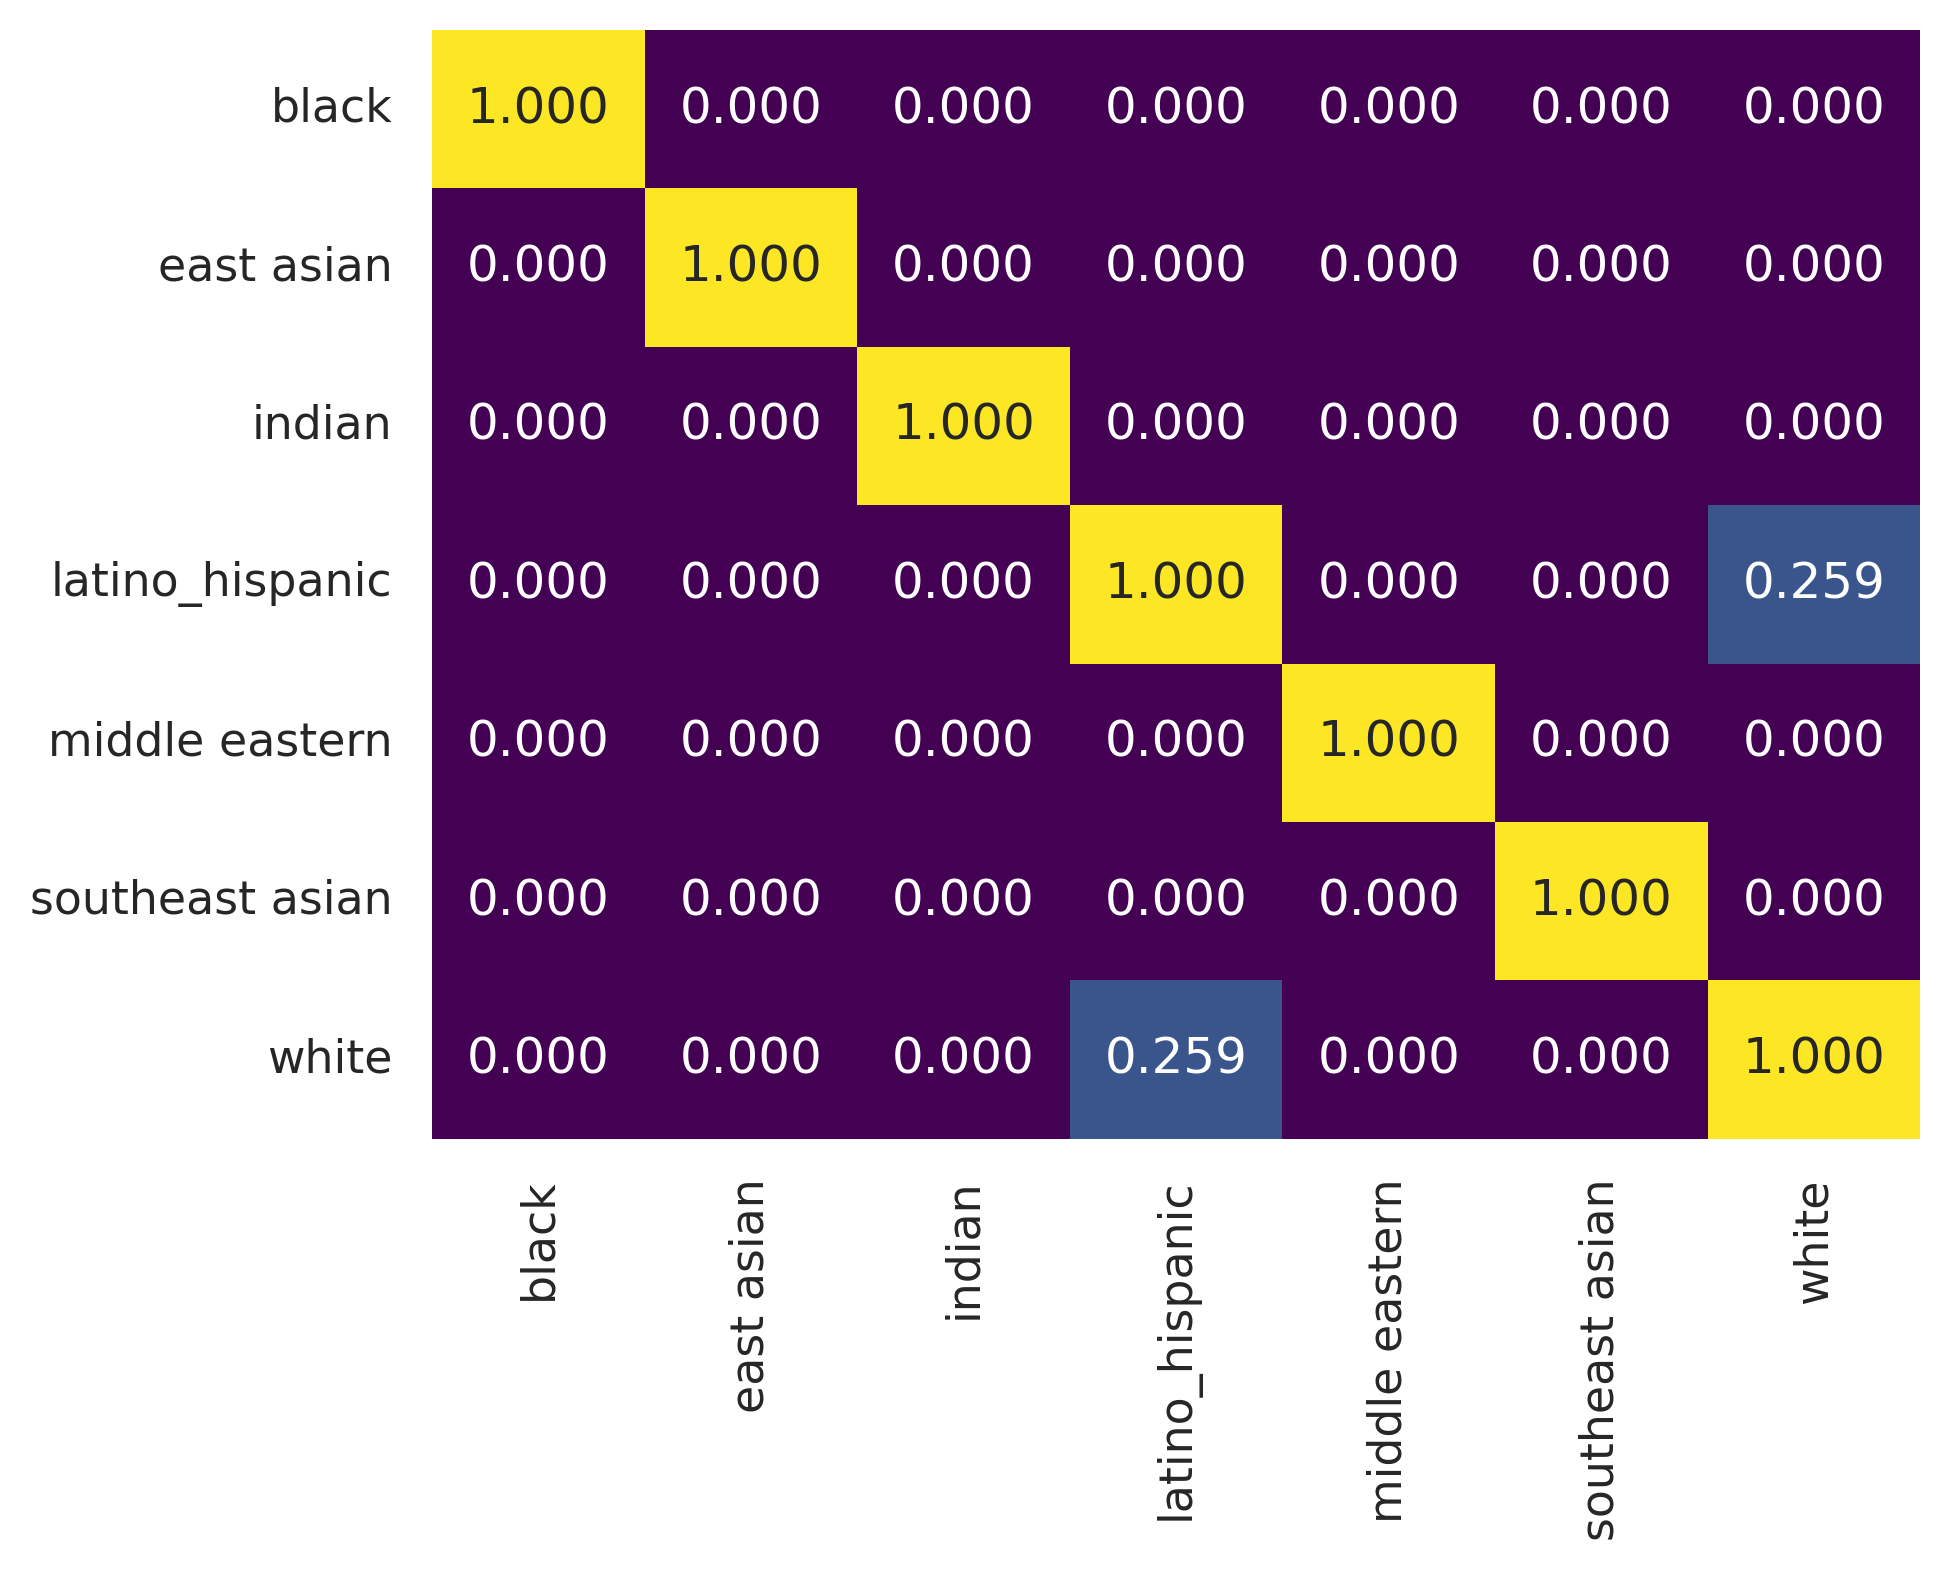

In [27]:
p_values = posthoc_dunn(df, 'scut_predictions', 'race', p_adjust='fdr_bh')
sns.heatmap(p_values, annot=True, fmt='.3f', cmap='viridis', cbar=False)

<Axes: xlabel='scut_predictions', ylabel='race'>

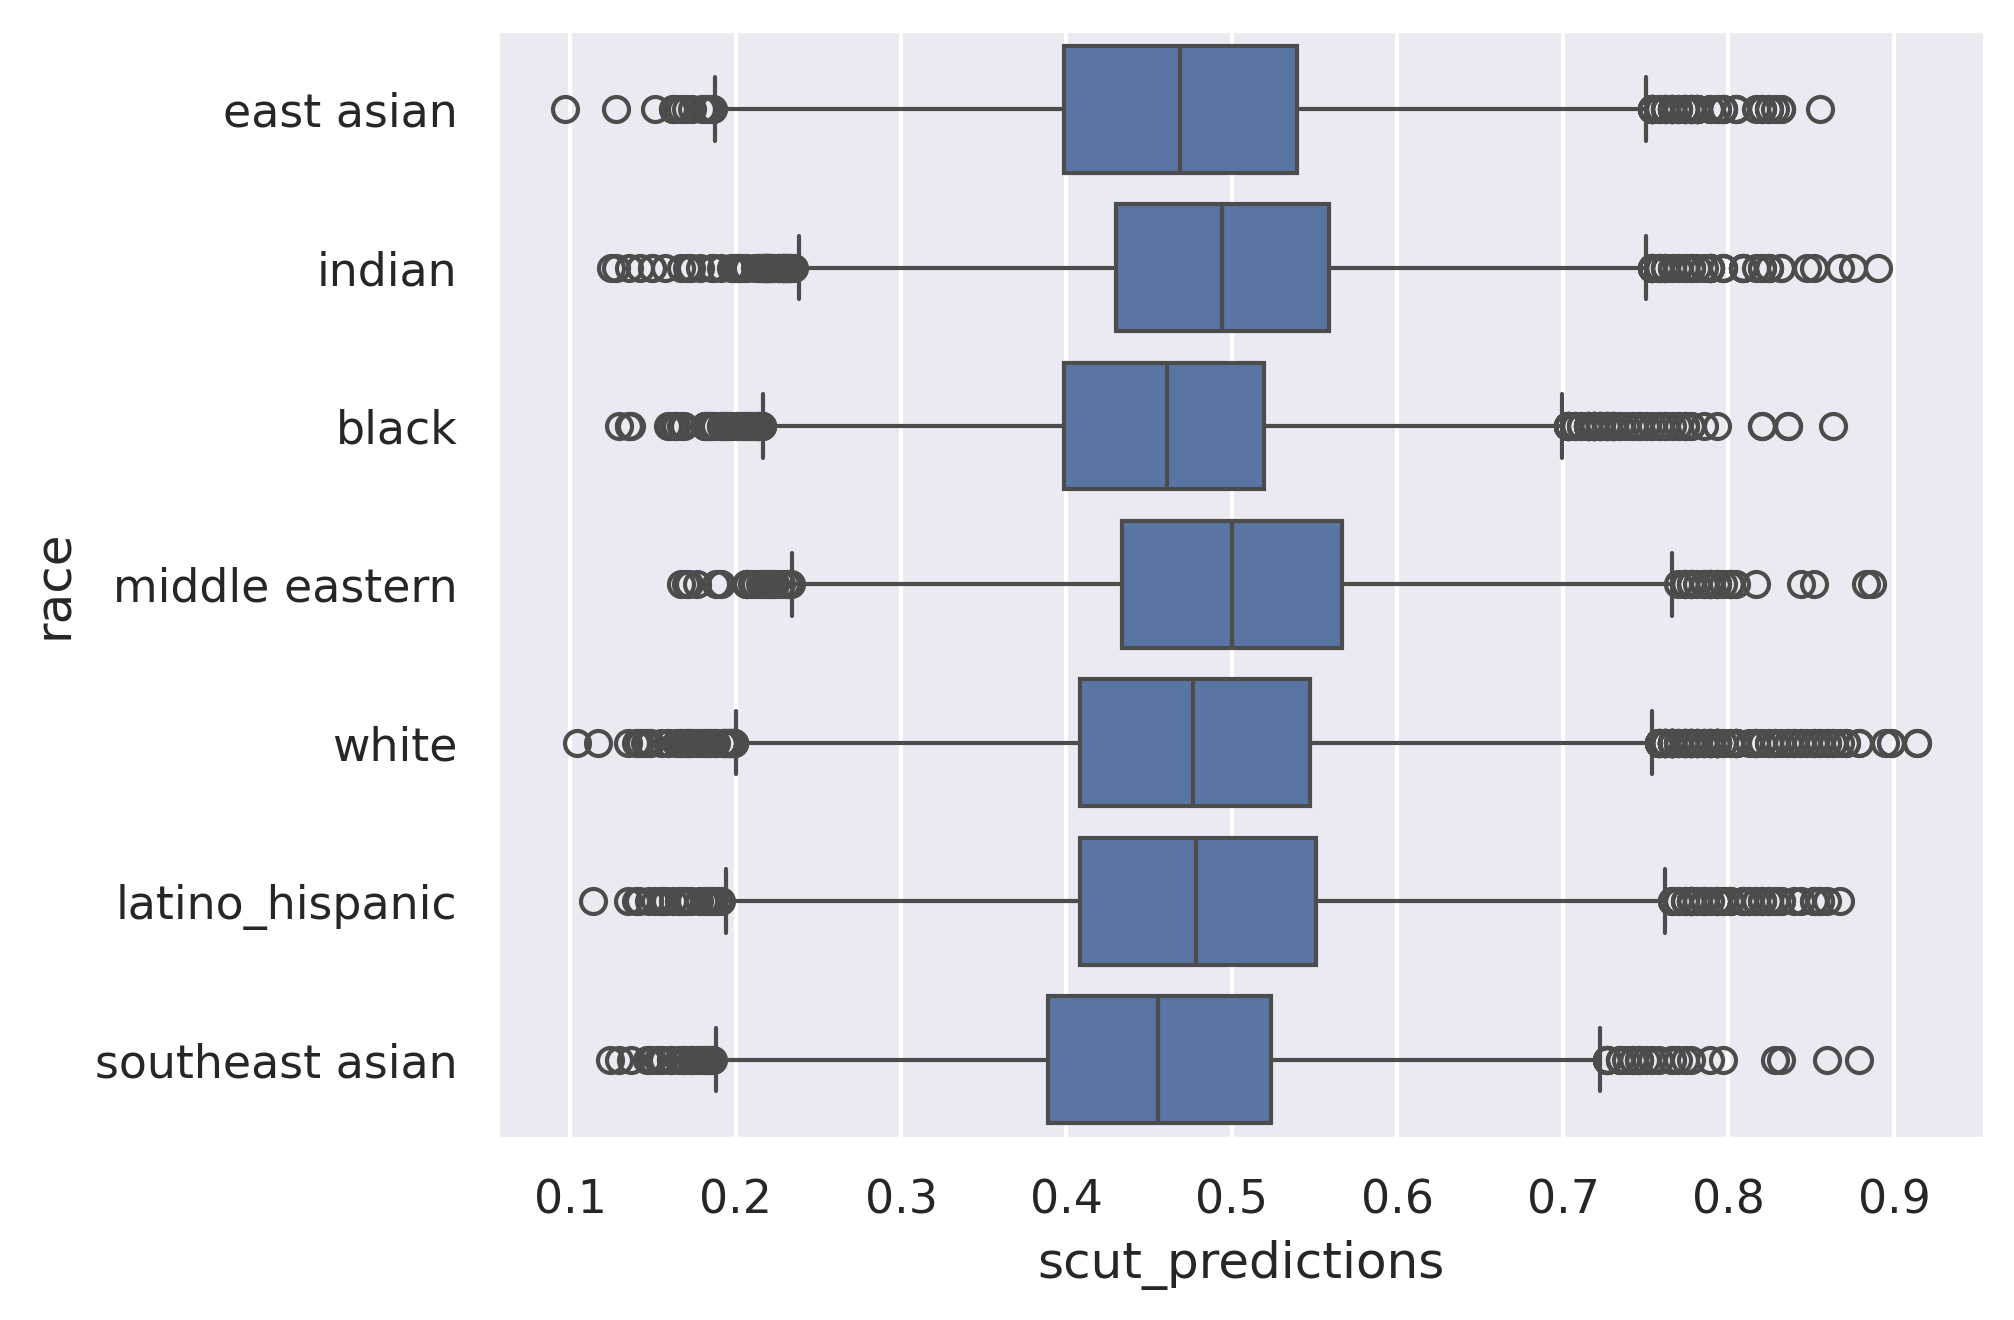

In [28]:
sns.boxplot(df, x='scut_predictions', y='race')

<Axes: xlabel='scut_predictions', ylabel='Density'>

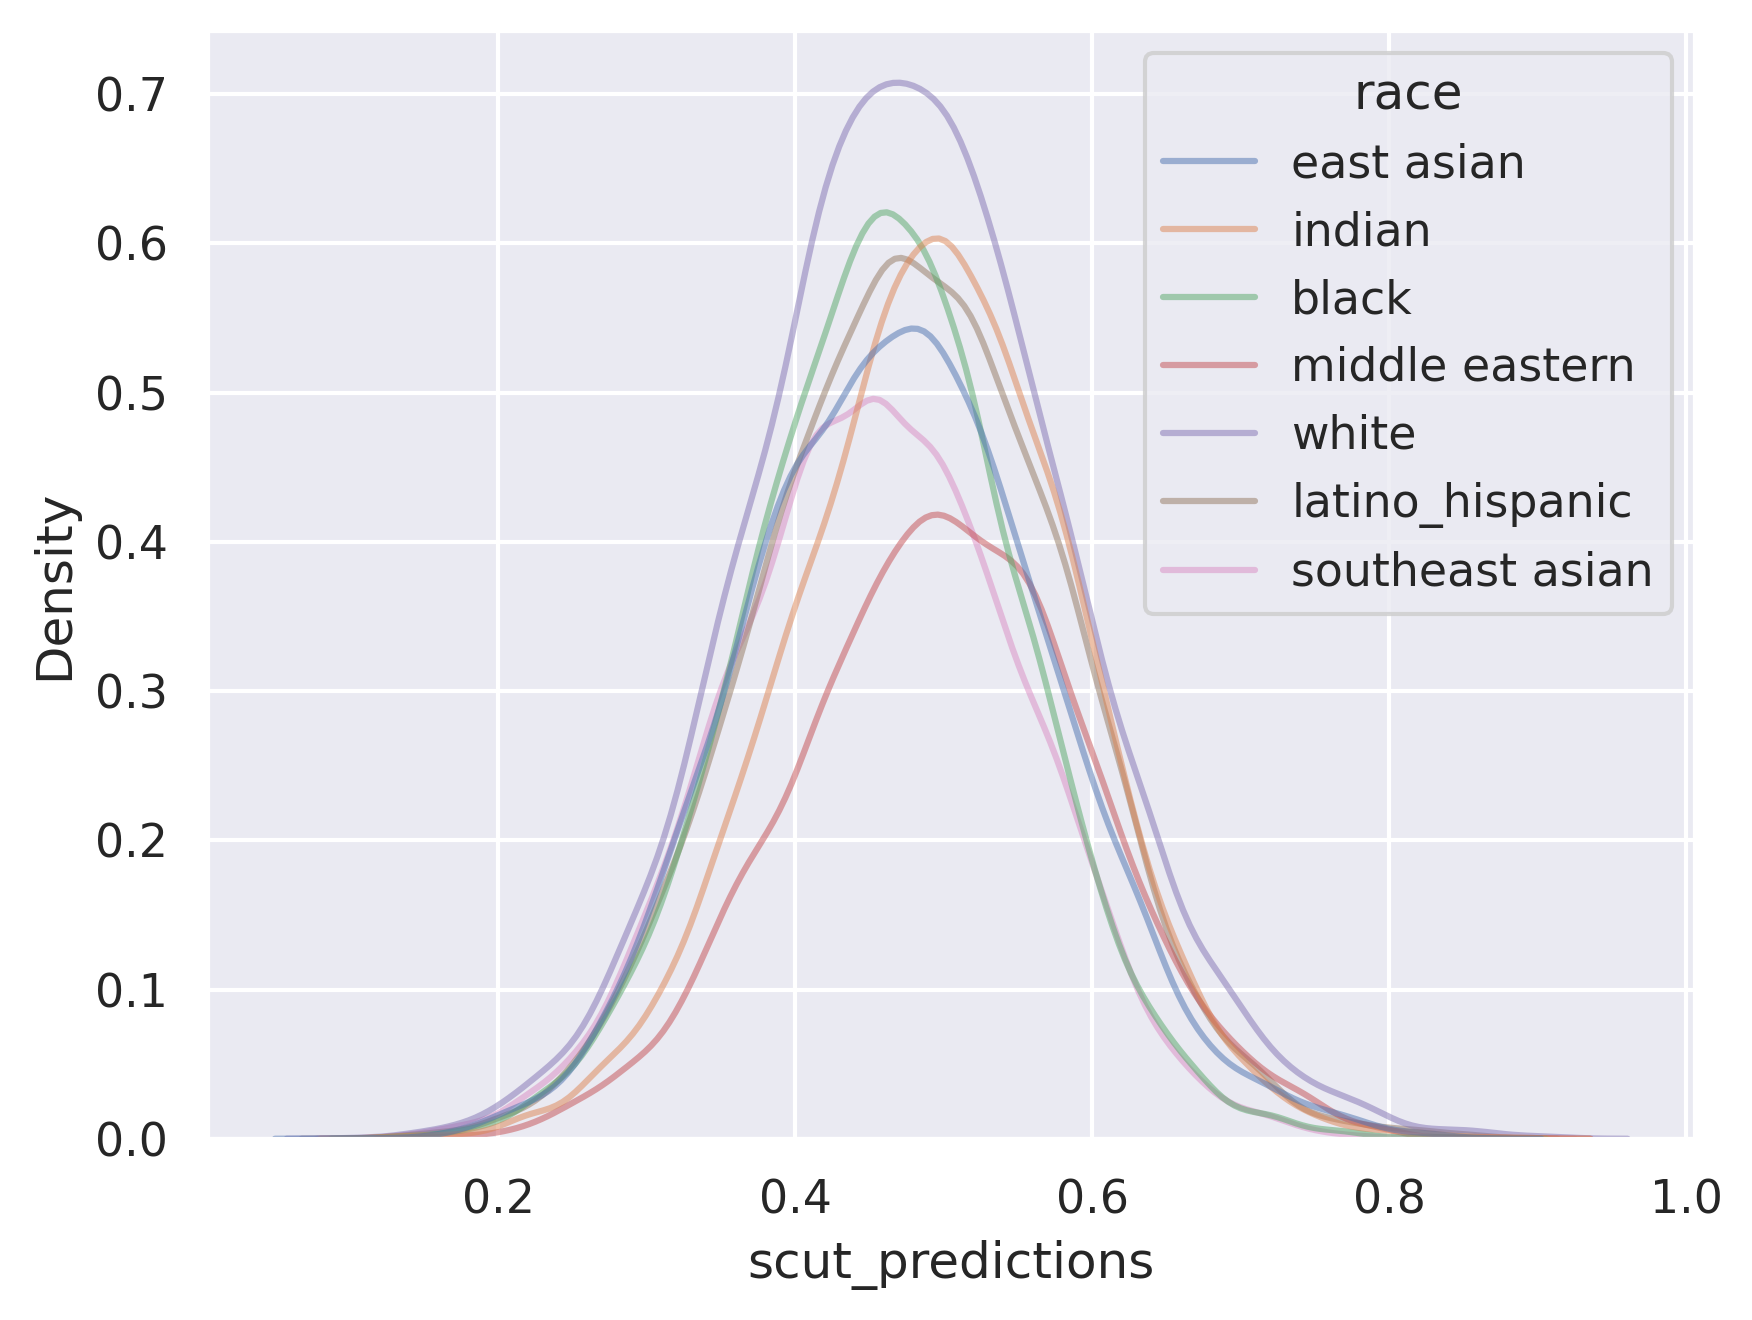

In [29]:
sns.kdeplot(data=df, x='scut_predictions', hue='race', alpha=0.5)

# Meb Prediction Analysis

In [30]:
stats.kruskal(df.loc[df.race == 'white', 'meb_predictions'], df.loc[df.race == 'latino_hispanic', 'meb_predictions'], df.loc[df.race == 'indian', 'meb_predictions'], df.loc[df.race == 'east asian', 'meb_predictions'], df.loc[df.race == 'black', 'meb_predictions'], df.loc[df.race == 'southeast asian', 'meb_predictions'], df.loc[df.race == 'middle eastern', 'meb_predictions'])

KruskalResult(statistic=1716.750657912684, pvalue=0.0)

<Axes: >

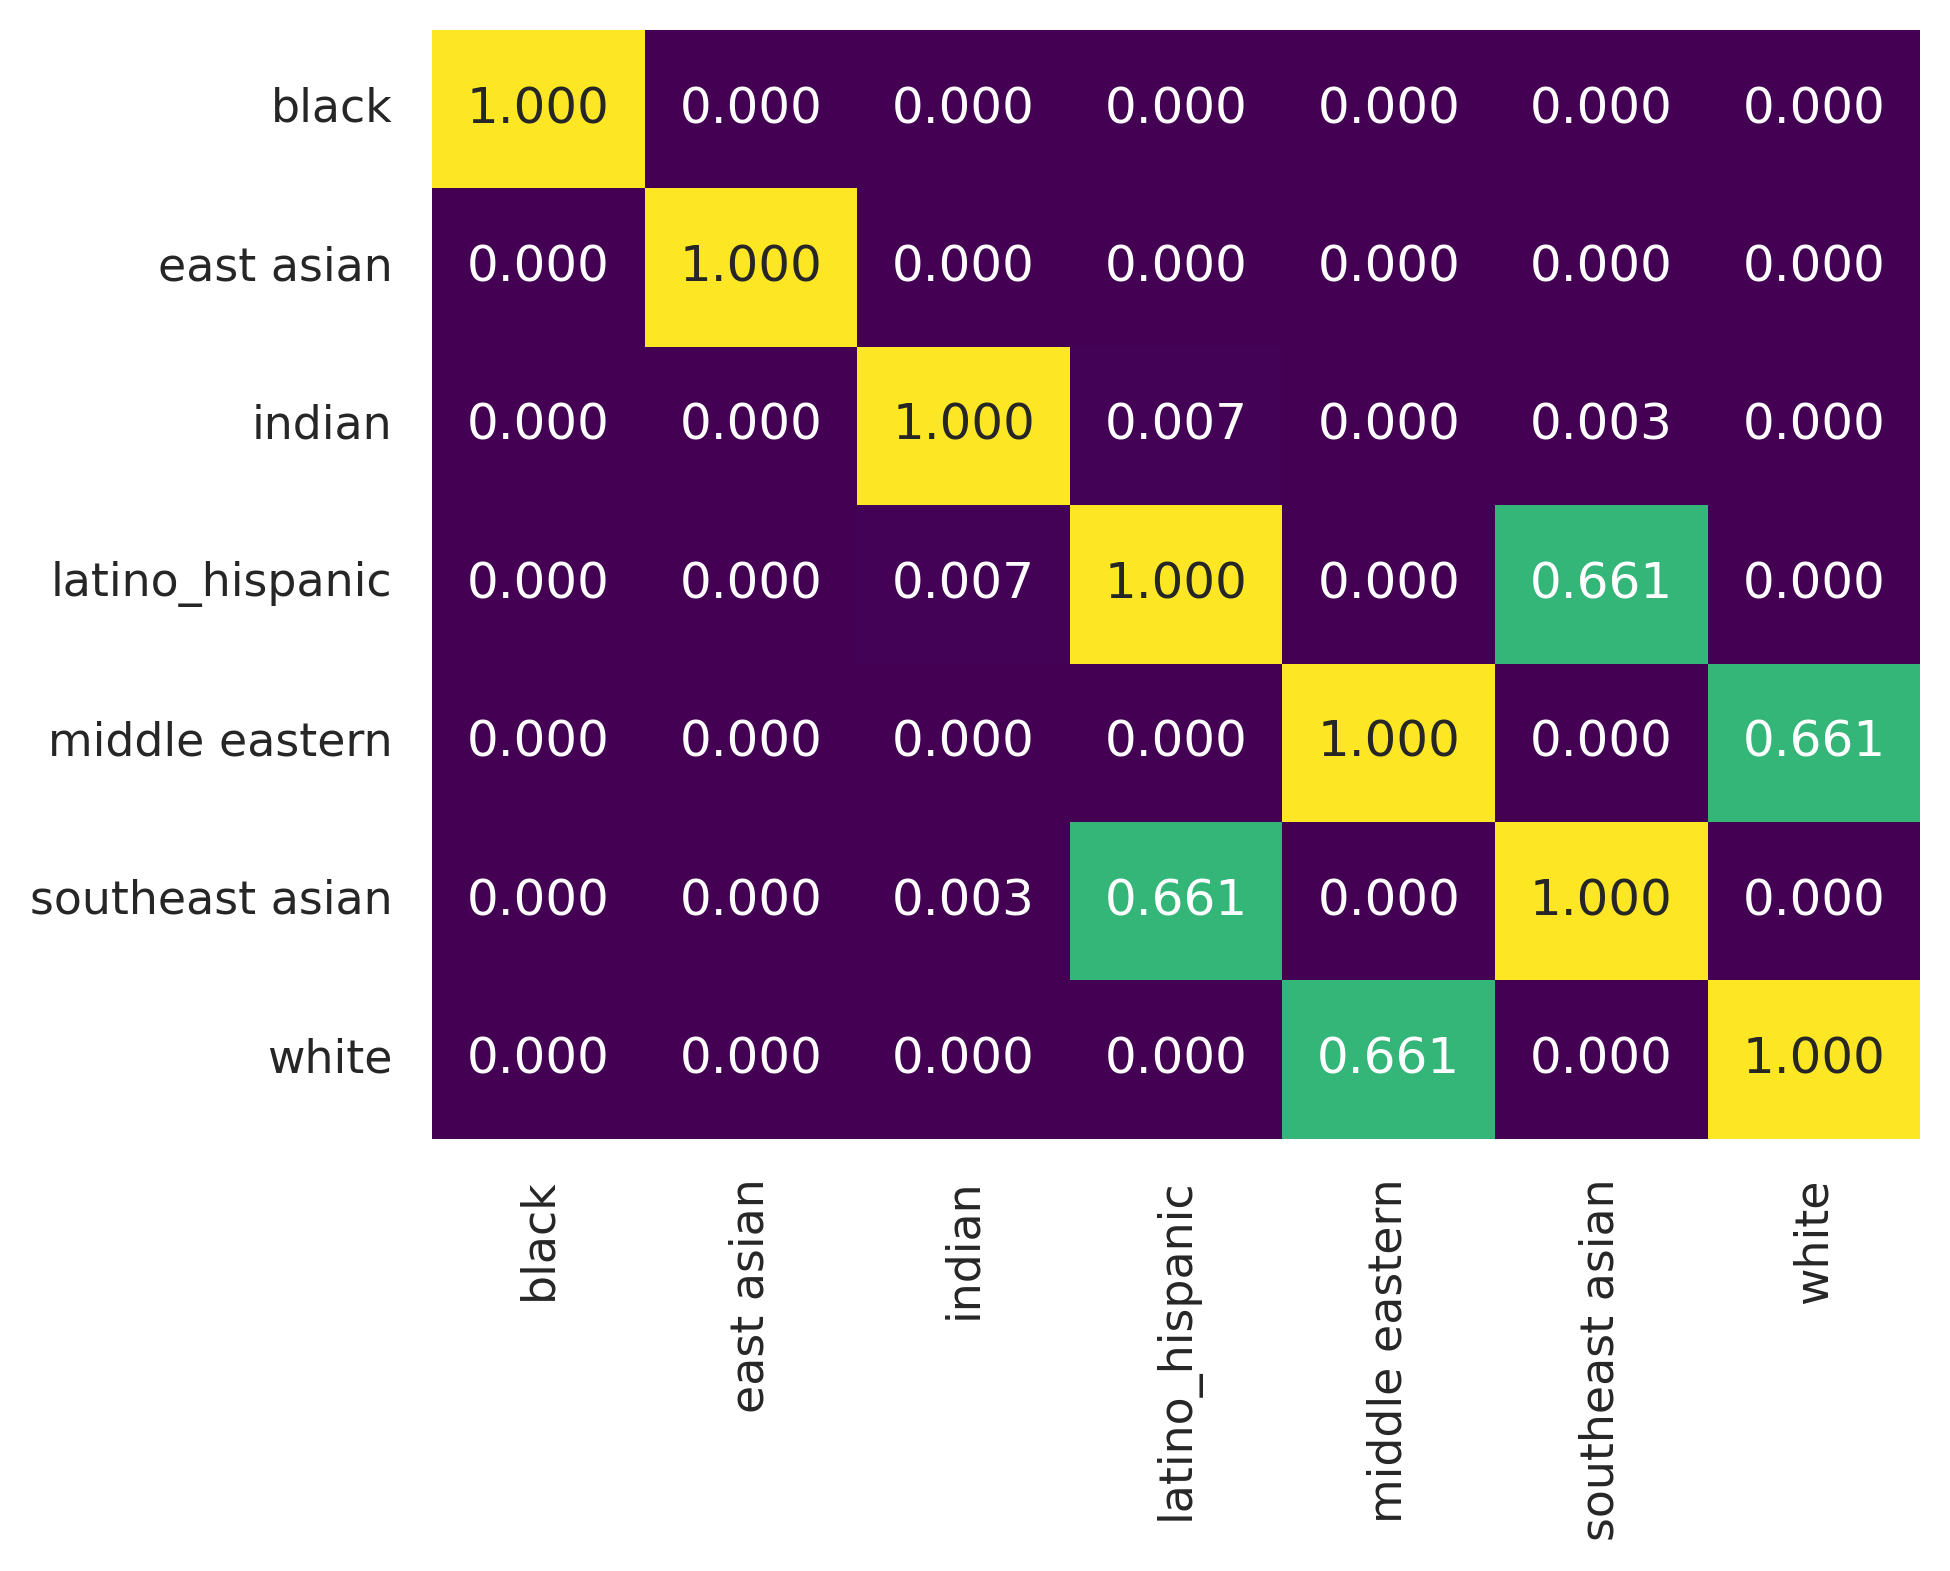

In [31]:
p_values = posthoc_dunn(df, 'meb_predictions', 'race', p_adjust='fdr_bh')
sns.heatmap(p_values, annot=True, fmt='.3f', cmap='viridis', cbar=False)

<Axes: xlabel='meb_predictions', ylabel='race'>

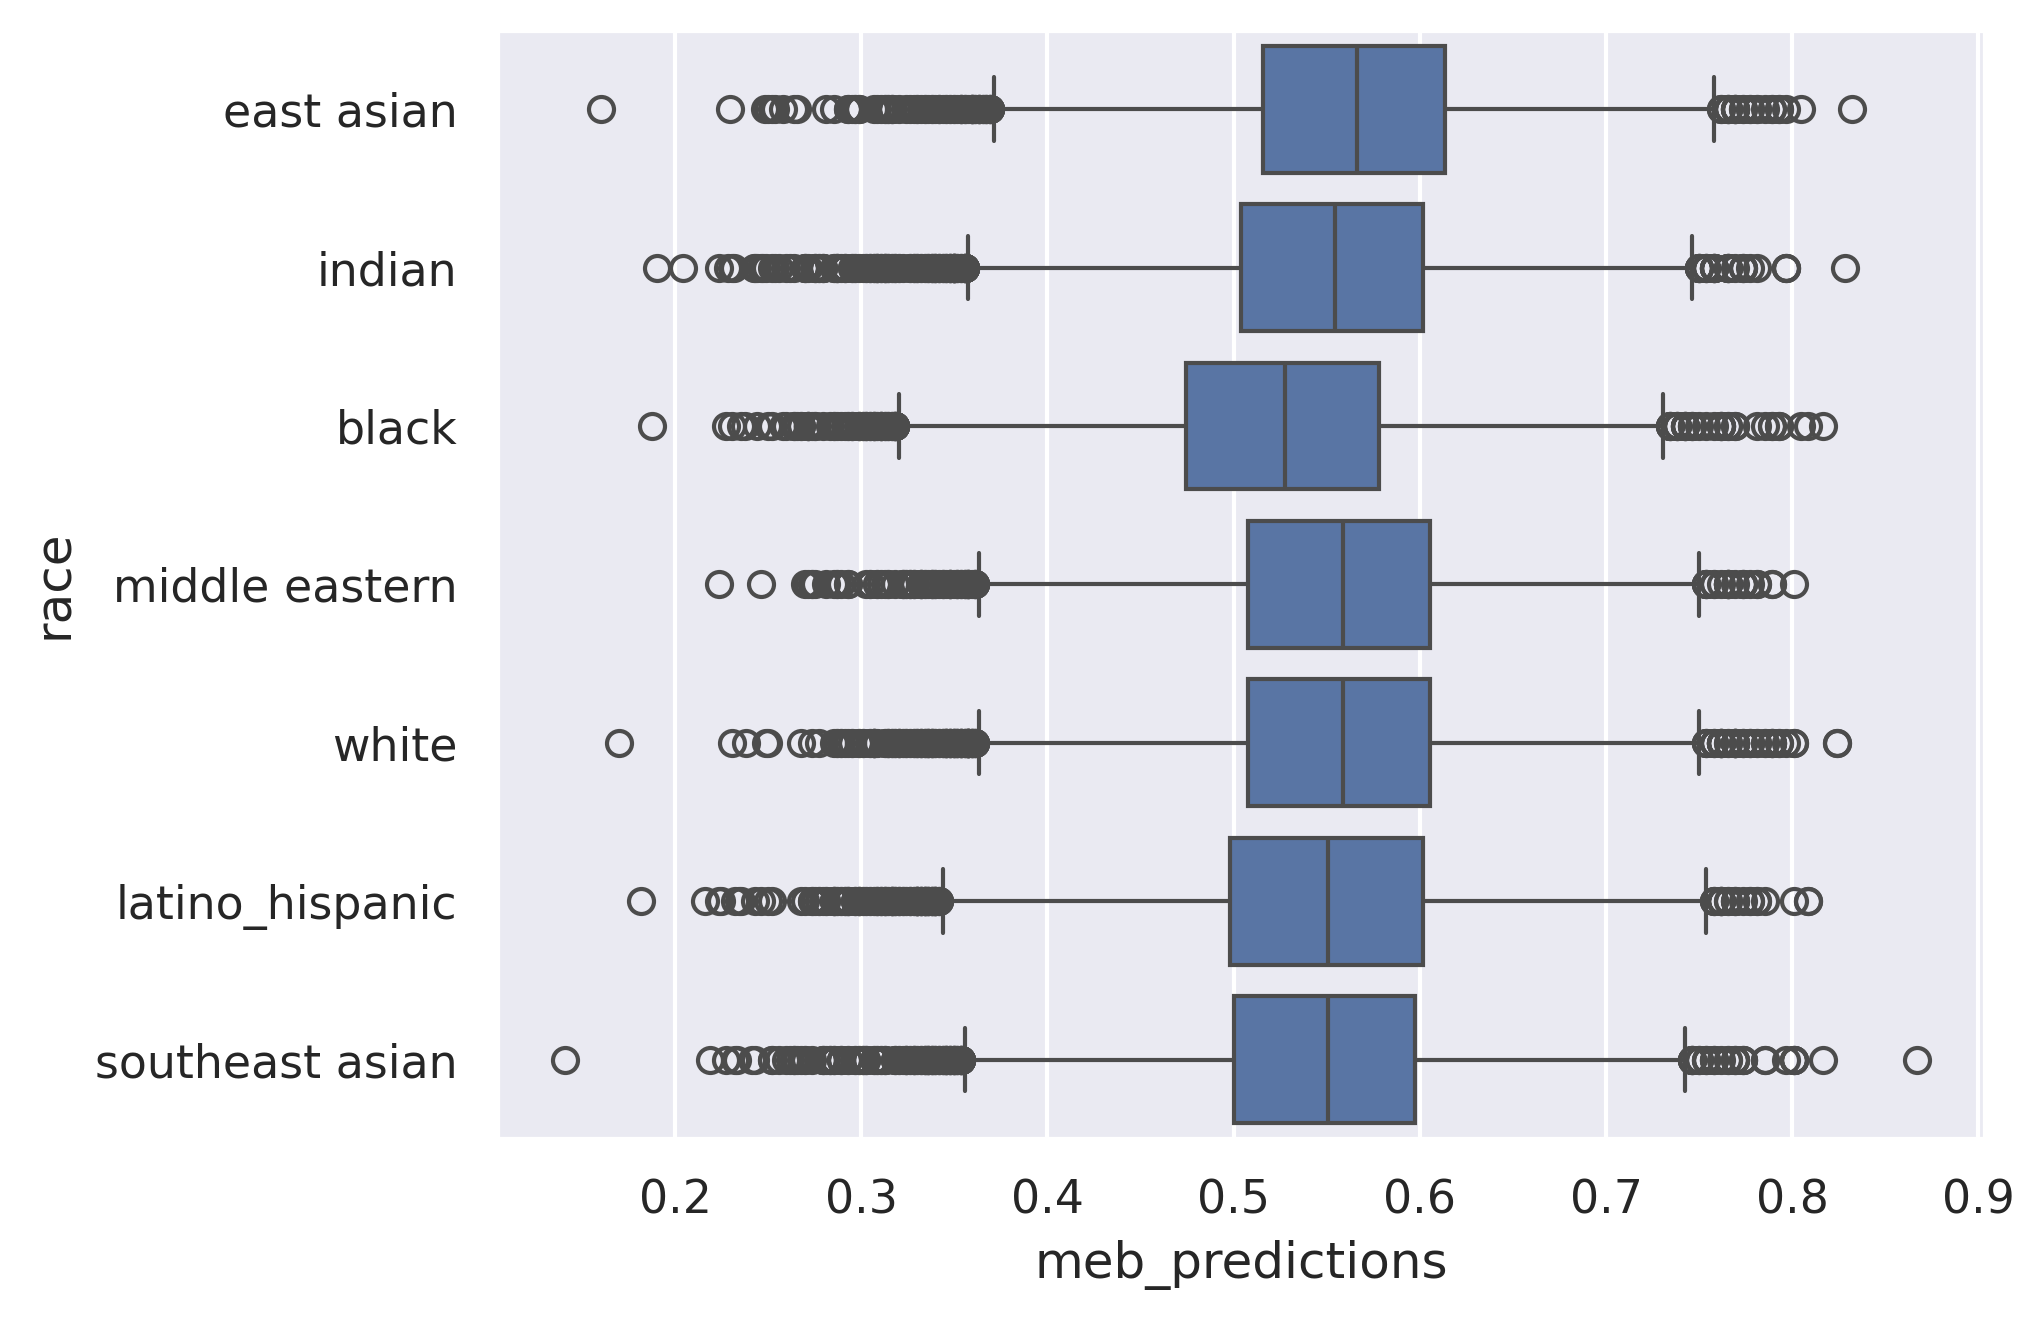

In [32]:
sns.boxplot(df, x='meb_predictions', y='race')

<Axes: xlabel='meb_predictions', ylabel='Density'>

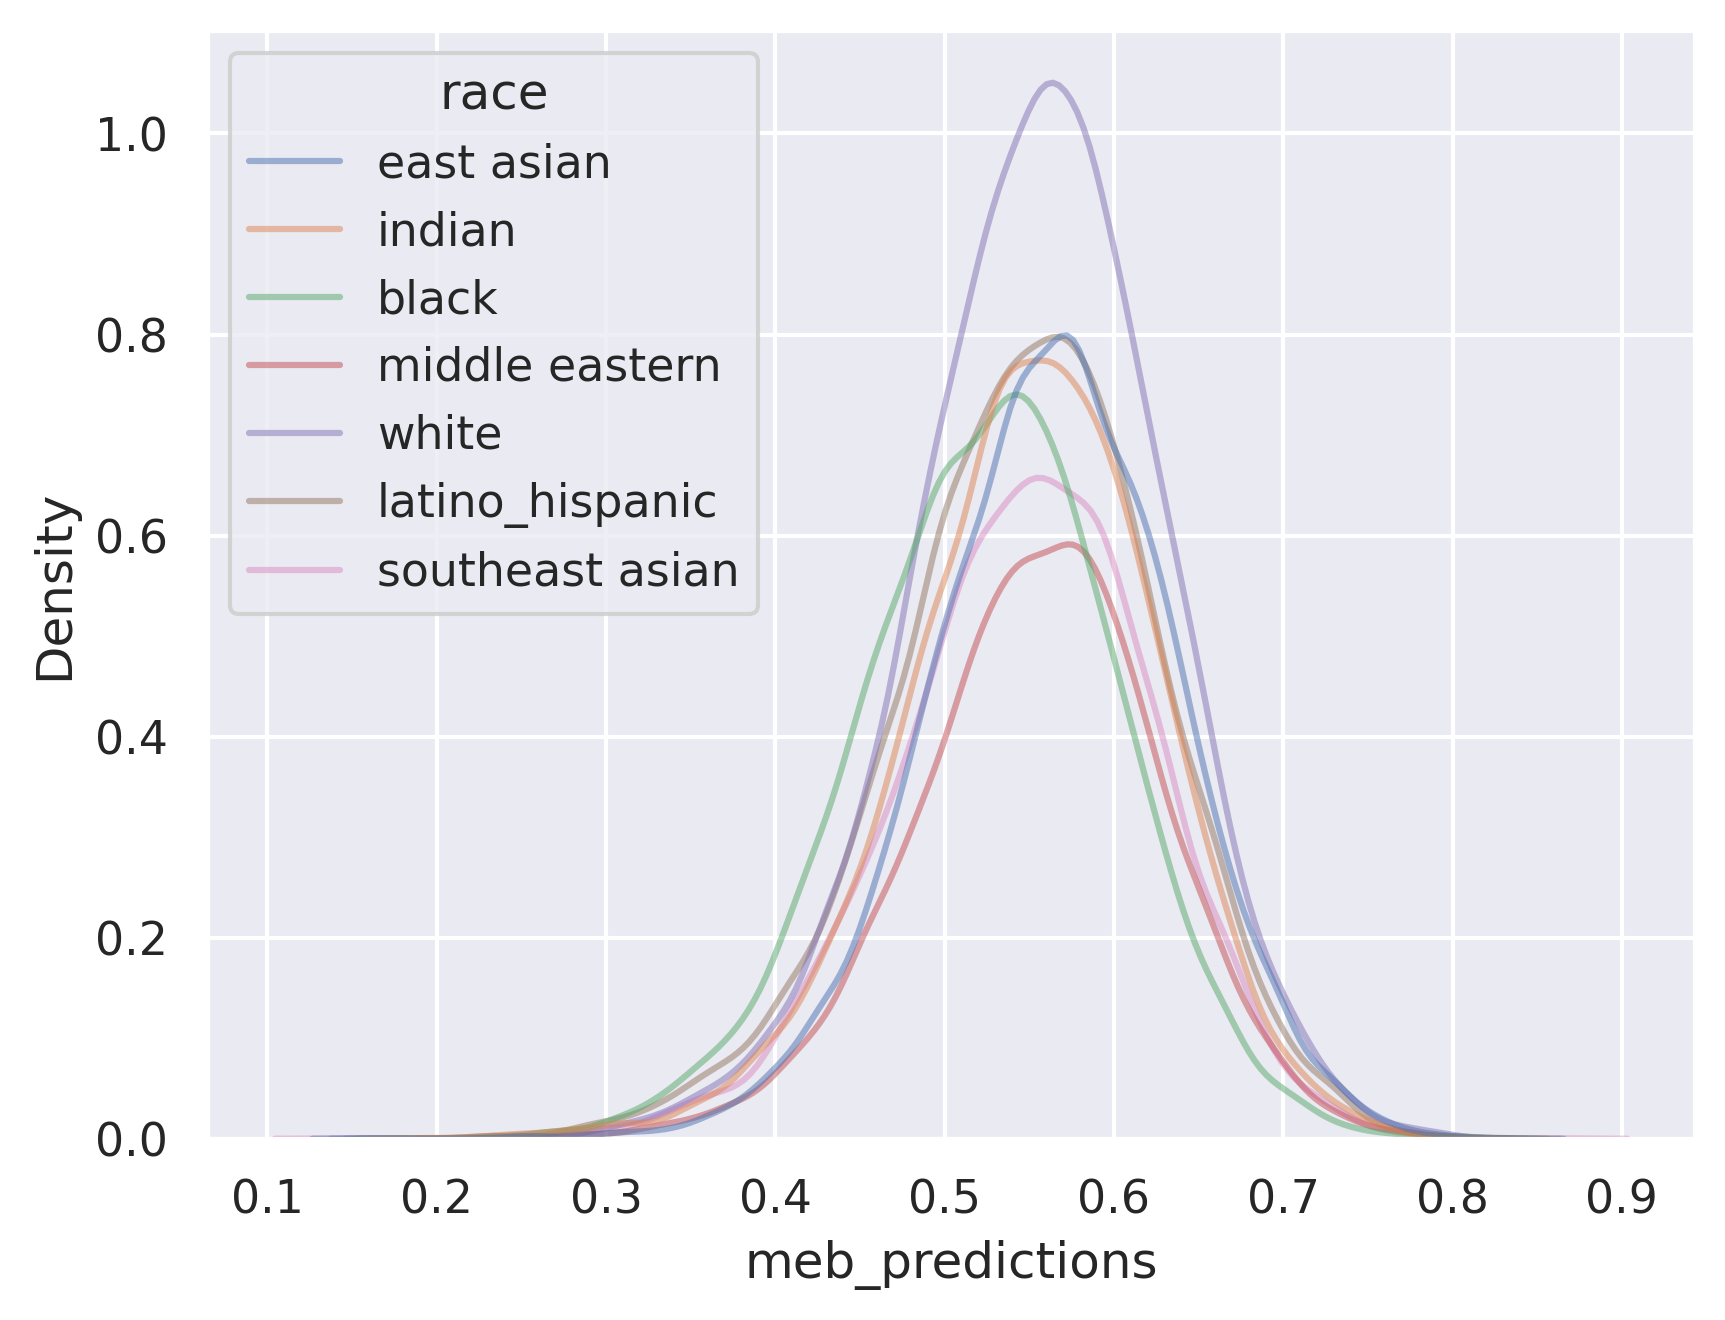

In [33]:
sns.kdeplot(data=df, x='meb_predictions', hue='race', alpha=0.5)